<a href="https://colab.research.google.com/github/Kareem47/studious-fiesta/blob/main/Kaggle_HousePricing_Kareem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [444]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [281]:
train=pd.read_csv("/content/sample_data/train.csv")
test_full=pd.read_csv("/content/sample_data/test.csv")

# Data exploration

In [282]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [283]:
train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [284]:
print(train.shape)
print(test_full.shape)


(1460, 81)
(1459, 80)


Train and test are 50:50, it would have been better if 80:20

In [285]:
train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

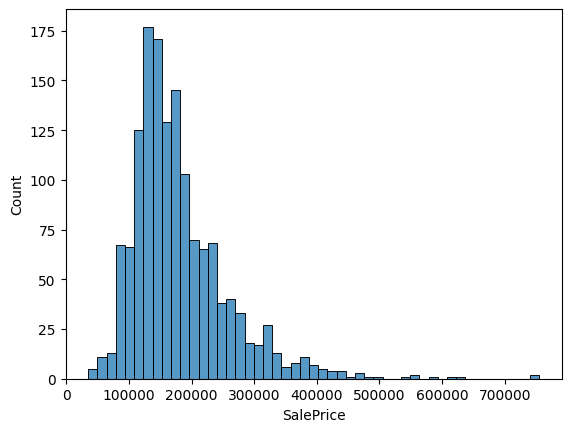

In [286]:
sns.histplot(train['SalePrice']);


In [287]:
df_train=train

leave 'train' as it is, and perform tests on df_train

# Numerical Data

In [288]:
def g(df):
    return df.select_dtypes(include=['int', 'float'])

In [289]:
Num_df=g(df_train)

Num_df includes the numerical variables only in my df

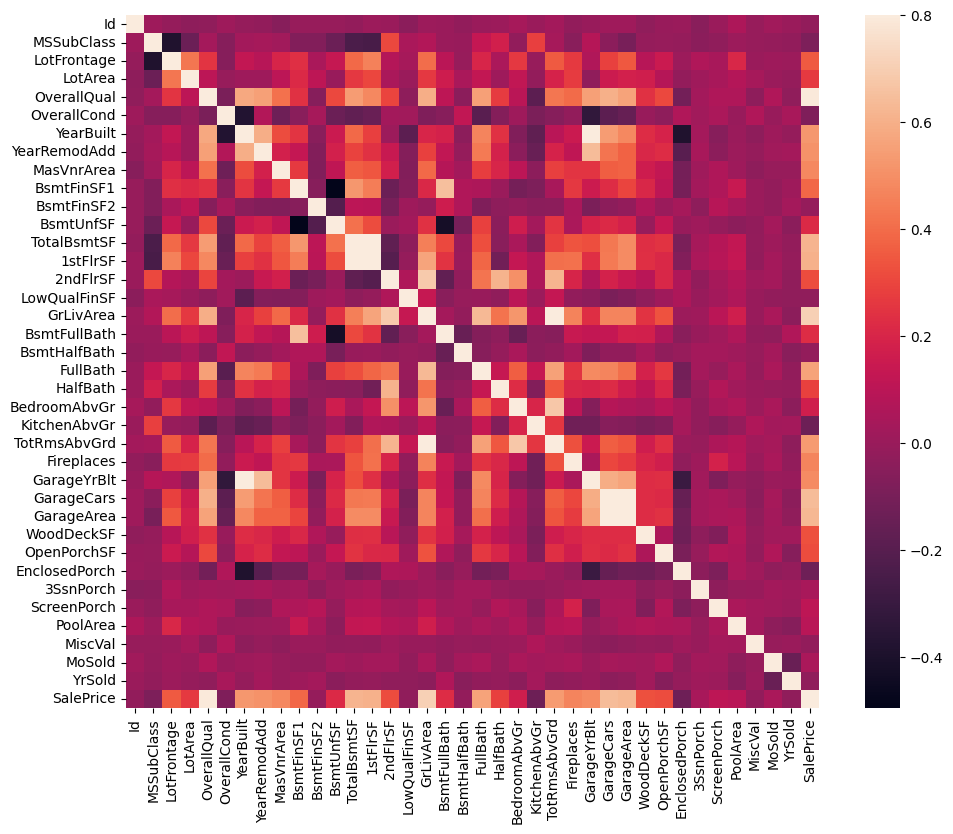

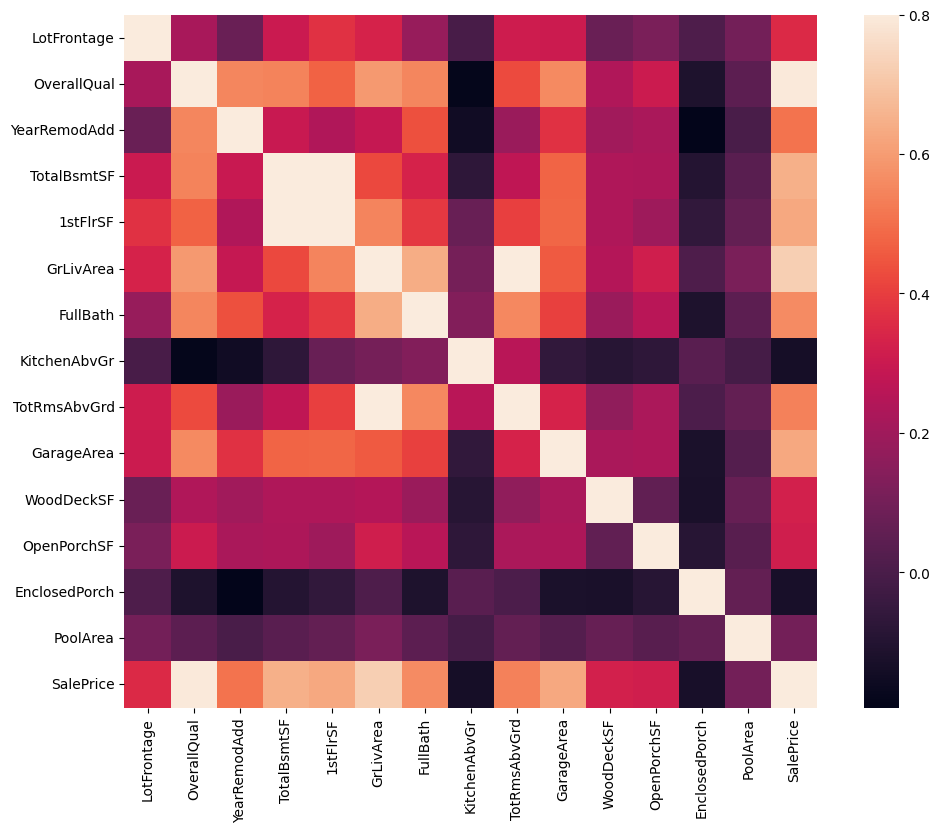

In [369]:
corrmat = Num_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

most noticeable correlated features with salePrice : 'OverallQual' , 'GrLivArea' ,  'TotalBsmtSF'

most noticeable correlated features with each other:[ 'TotalBsmtSF' and '1stFlrSF'] ,,,,  AND also the garage variables

In [370]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) >threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [371]:
important_features = correlation(Num_df, 0.7)
important_features

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'SalePrice', 'TotRmsAbvGrd'}

{'1stFlrSF', 'SalePrice', 'TotRmsAbvGrd'}

function isnt very accurate but i can agree with 1st flrSF, GarageArea,TotRmsAbvGrd,full bath

In [372]:
Num_df=Num_df[['LotFrontage','OverallQual','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','KitchenAbvGr','TotRmsAbvGrd','GarageArea','WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch','PoolArea','SalePrice']]

# Numerical data Outliers

In [373]:
features = ['LotFrontage', 'OverallQual', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea']


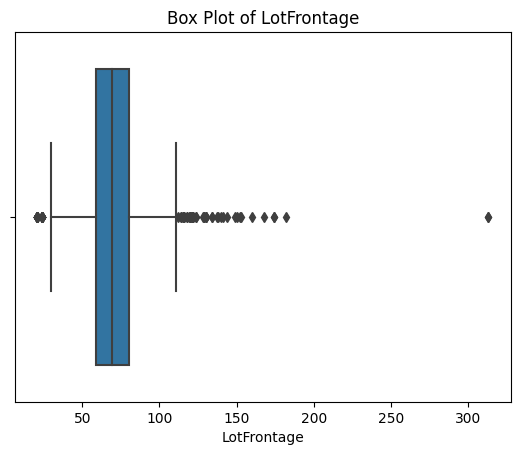

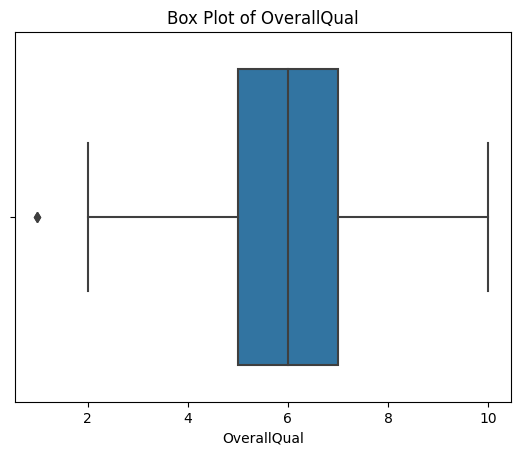

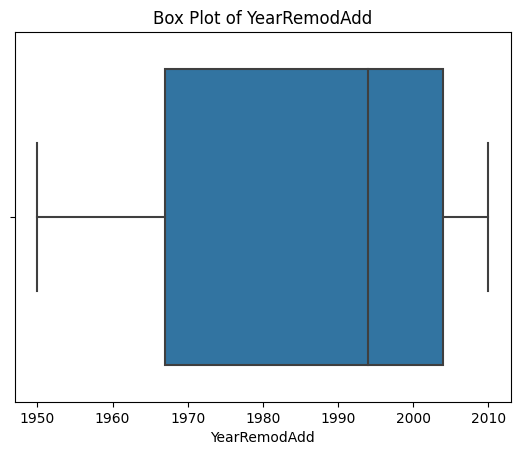

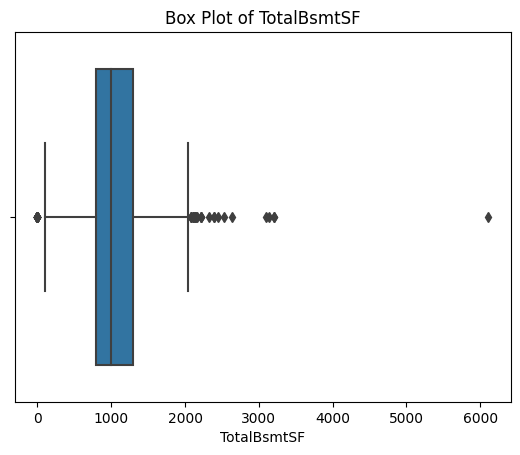

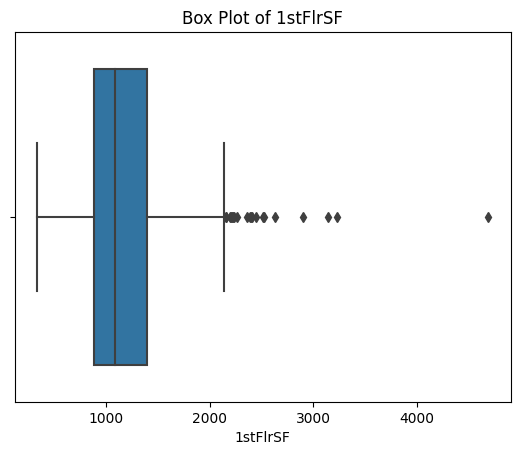

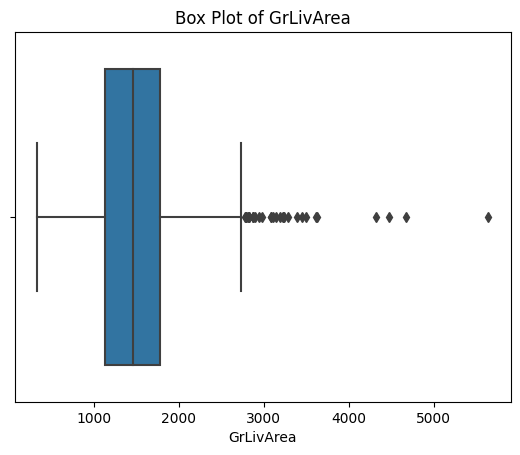

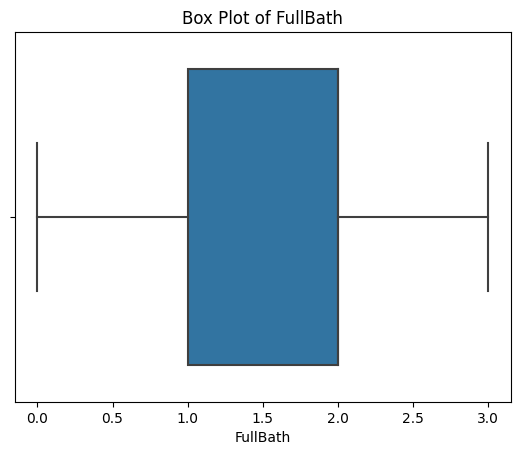

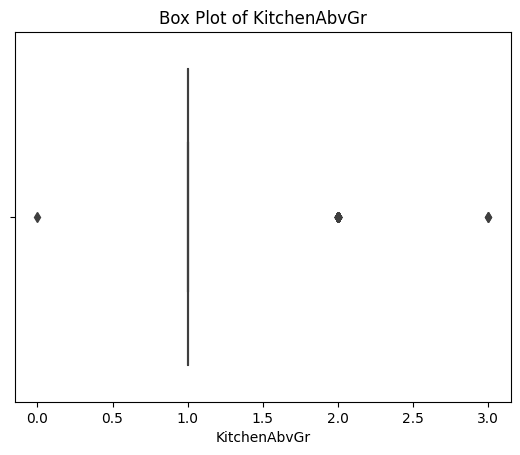

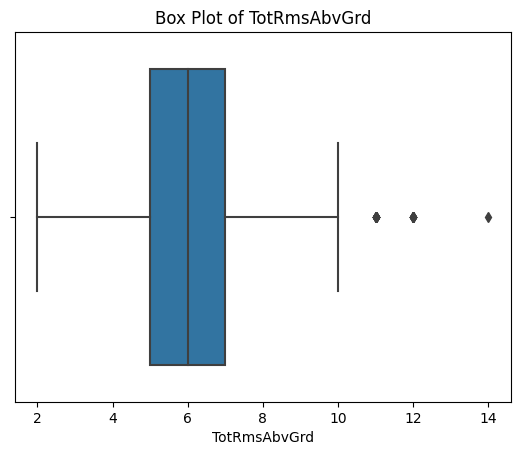

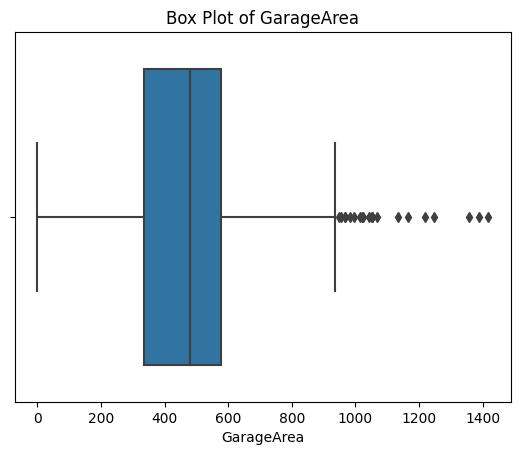

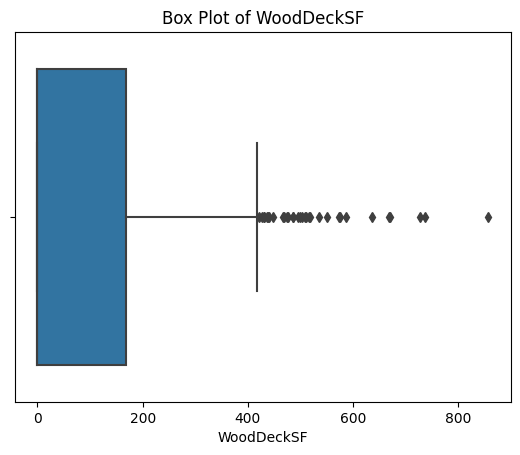

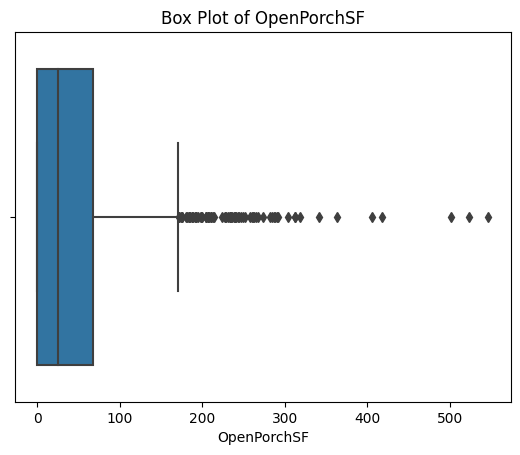

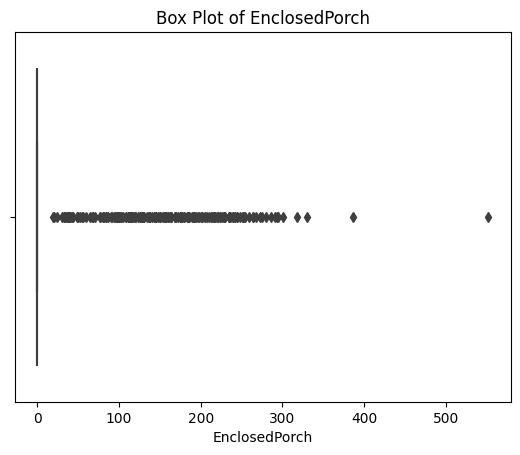

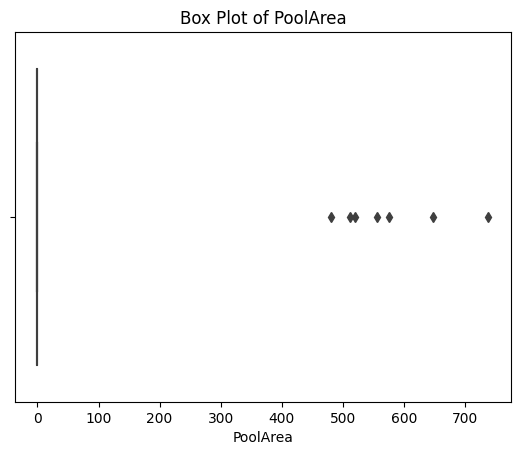

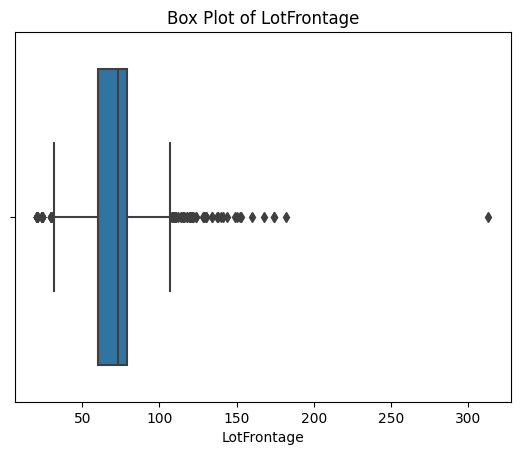

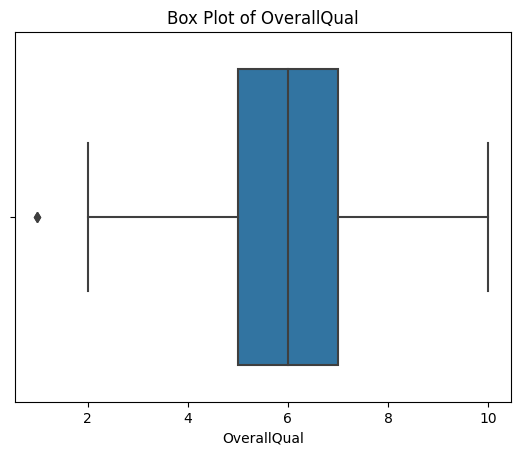

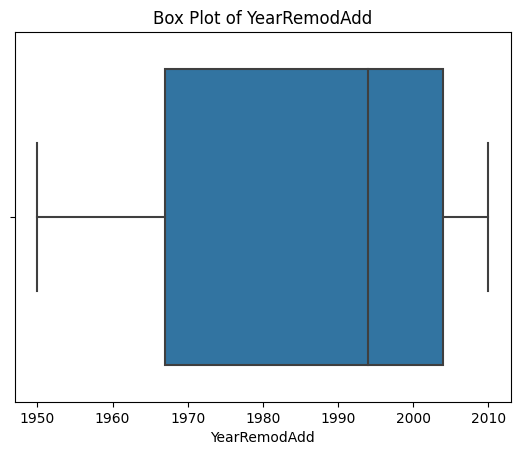

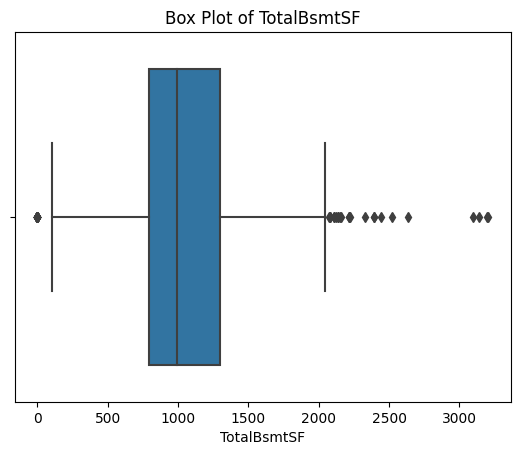

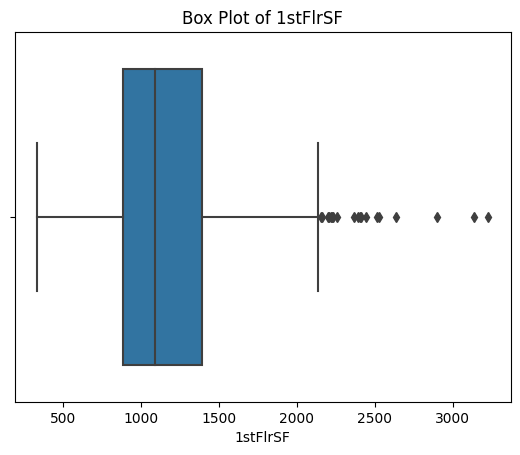

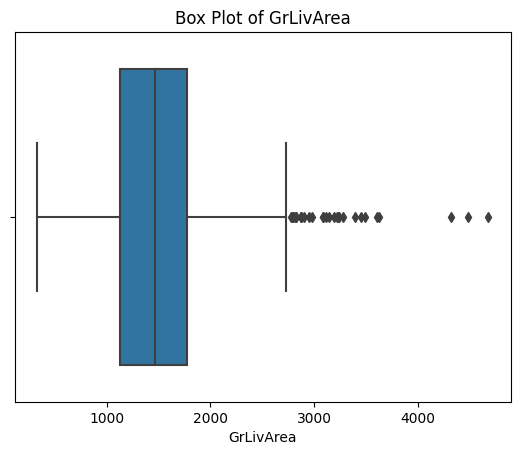

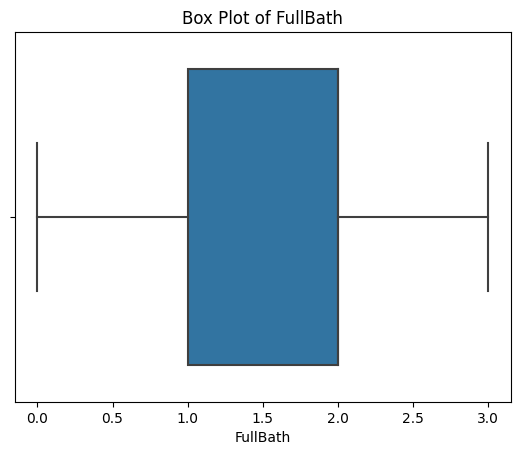

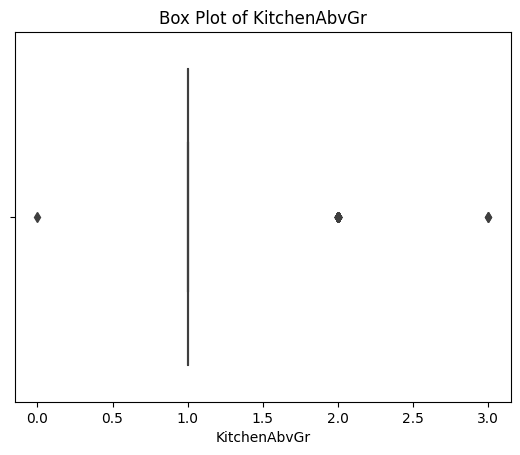

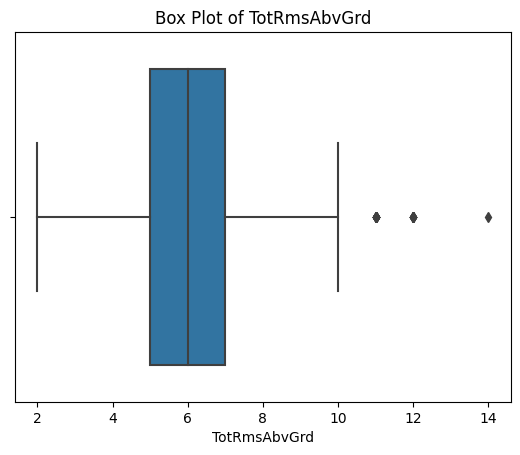

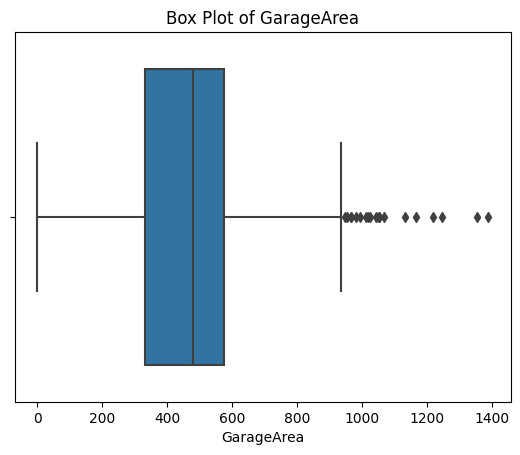

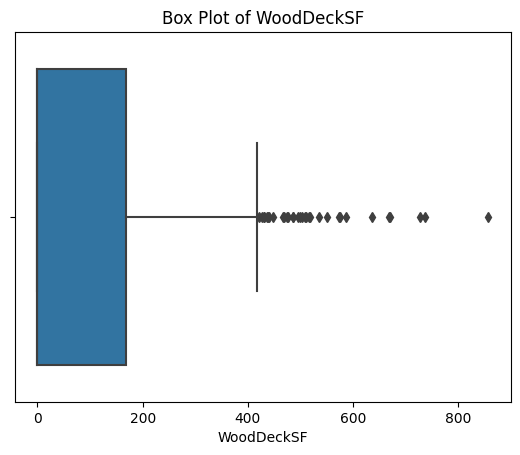

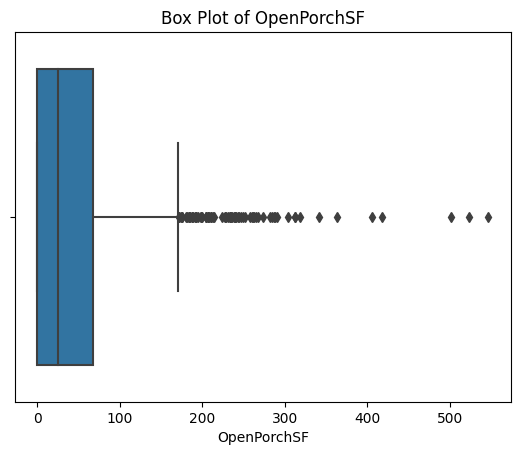

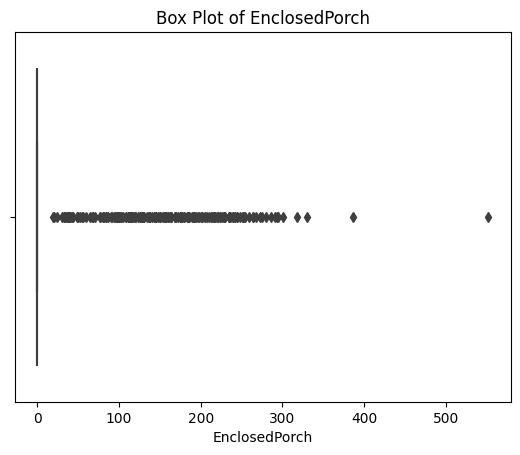

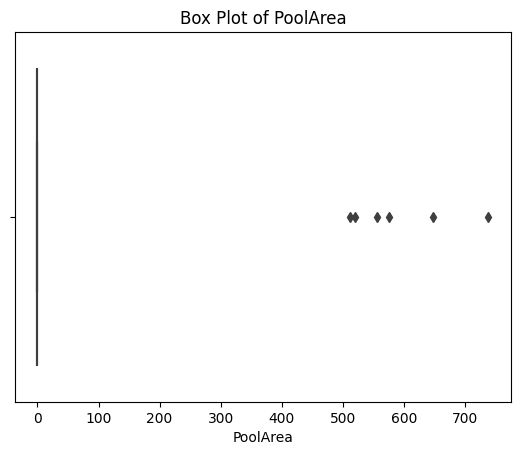

In [374]:
for feature in features:
    # Create a box plot.
    sns.boxplot(x=feature, data=Num_df)

    # Set the title of the plot.
    plt.title('Box Plot of {}'.format(feature))

    # Show the plot.
    plt.show()

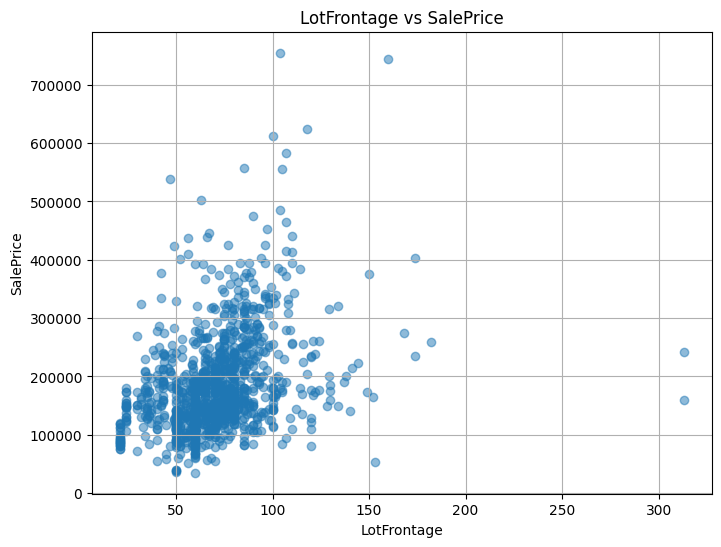

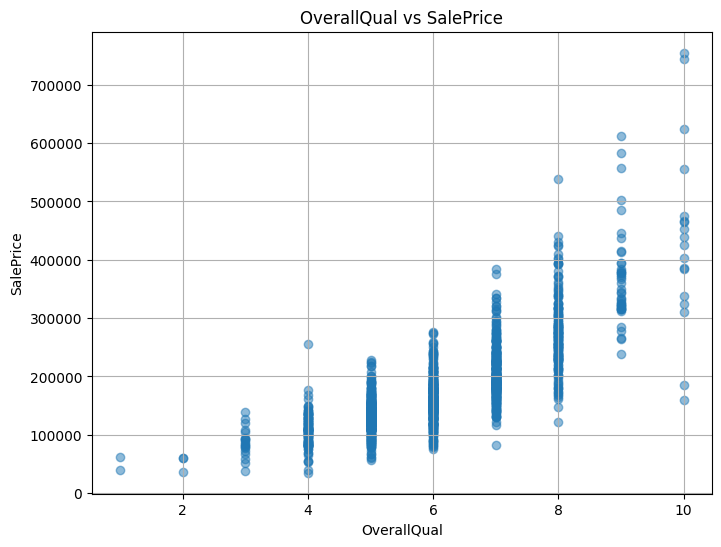

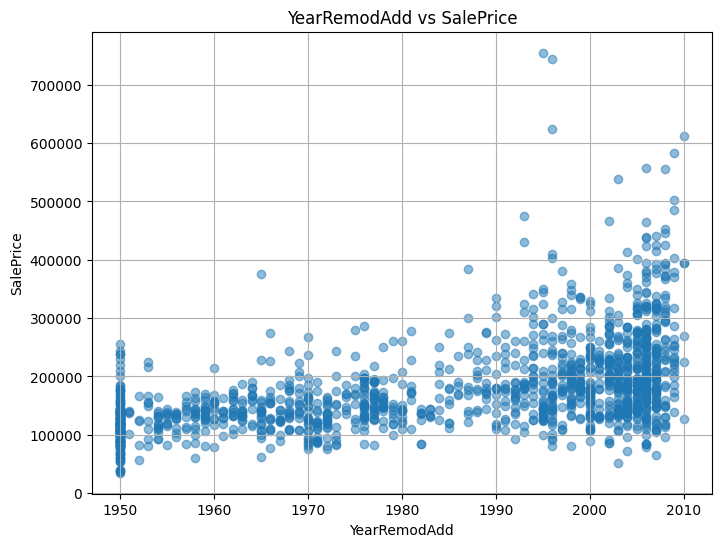

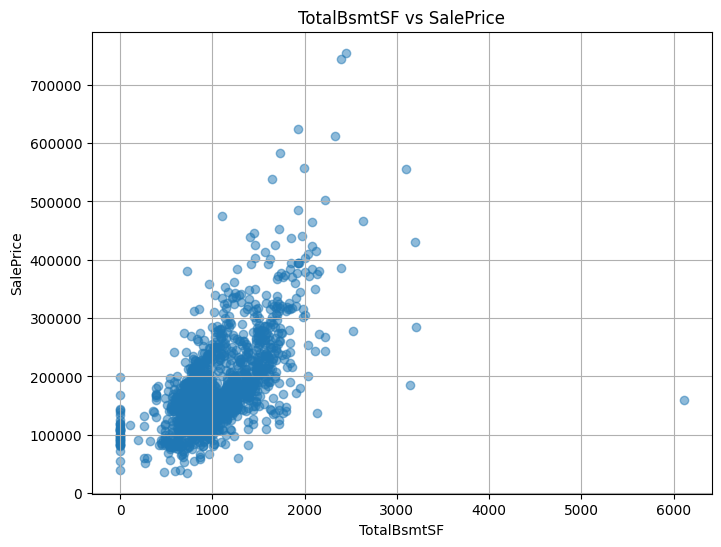

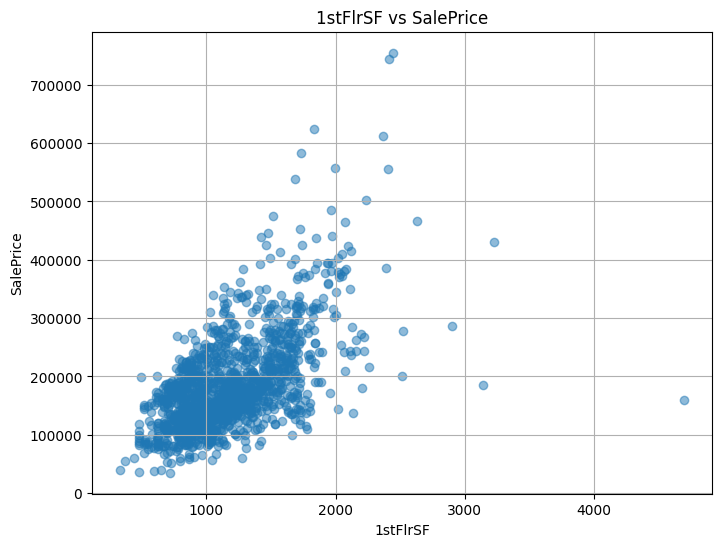

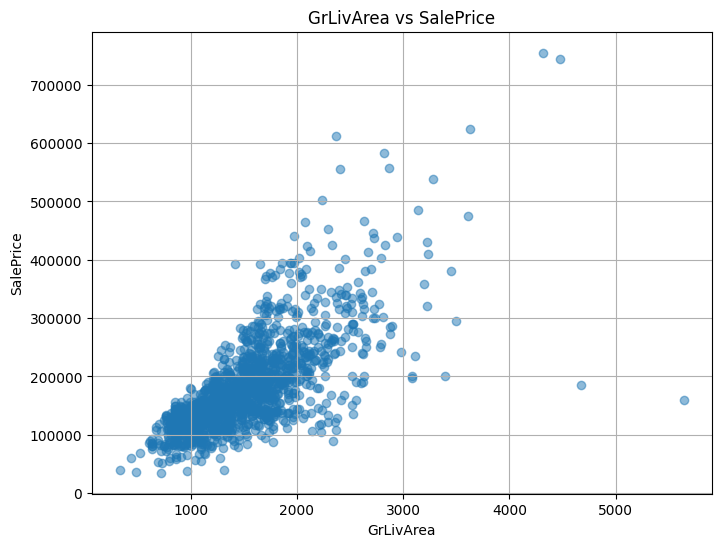

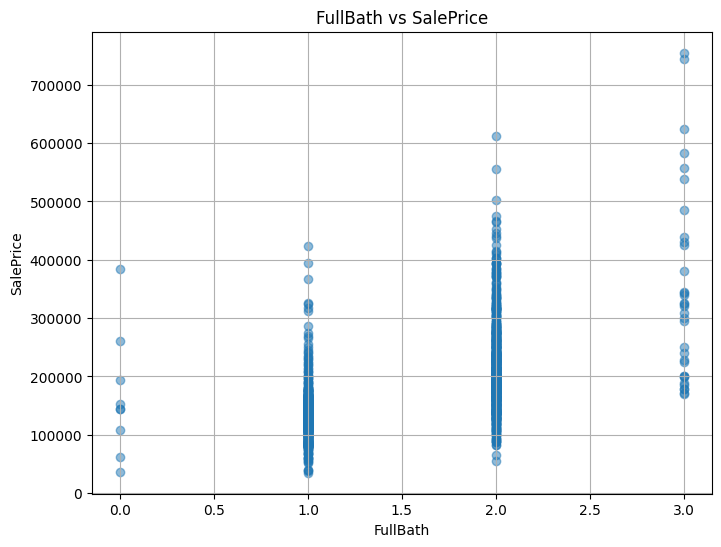

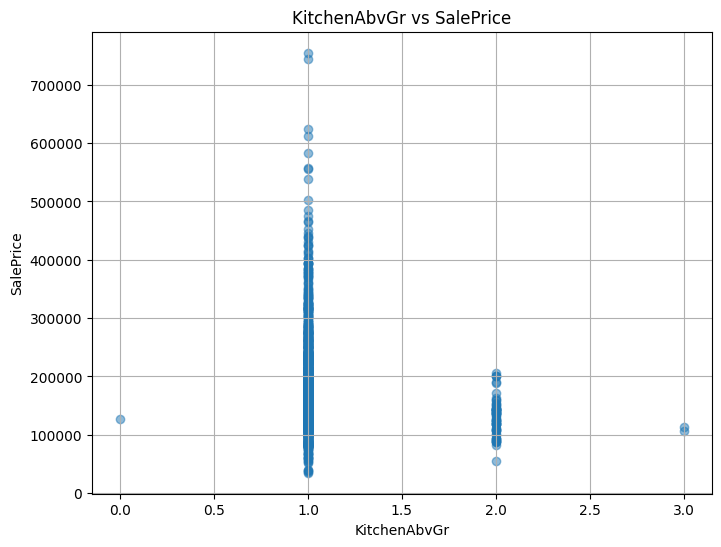

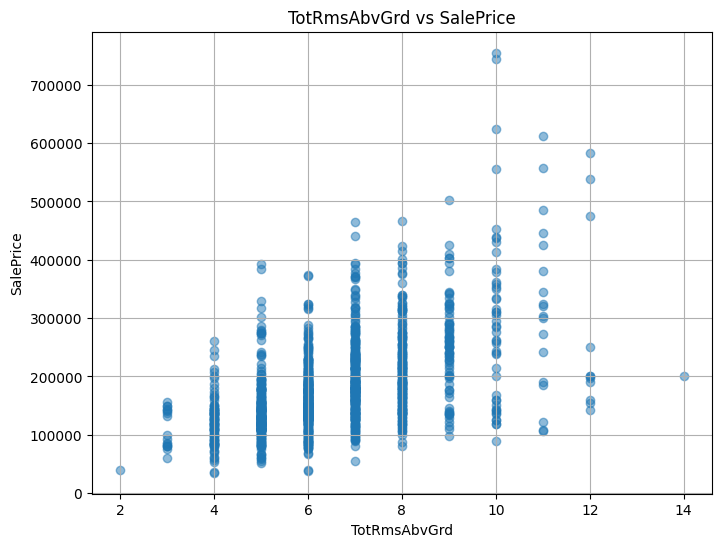

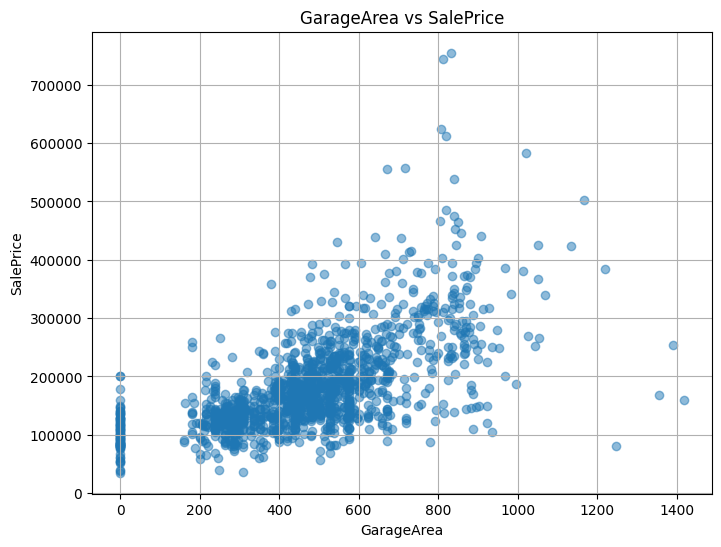

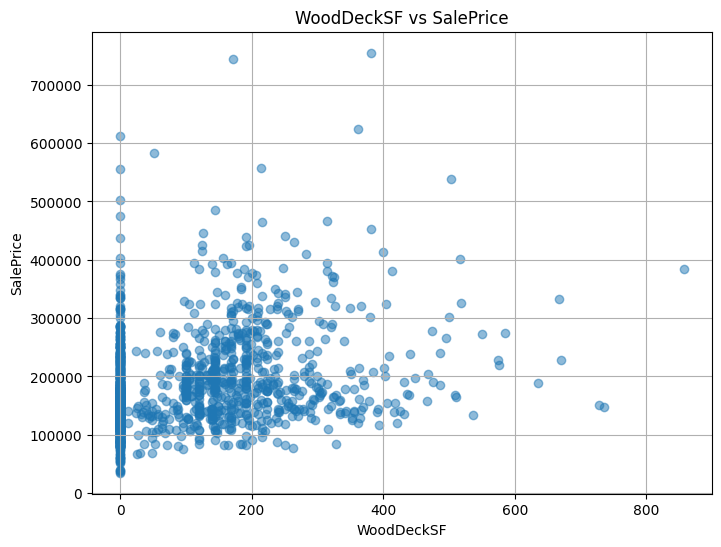

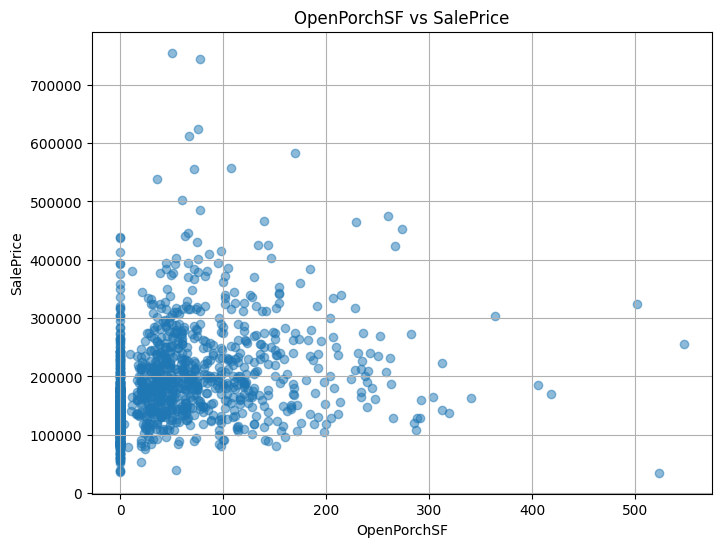

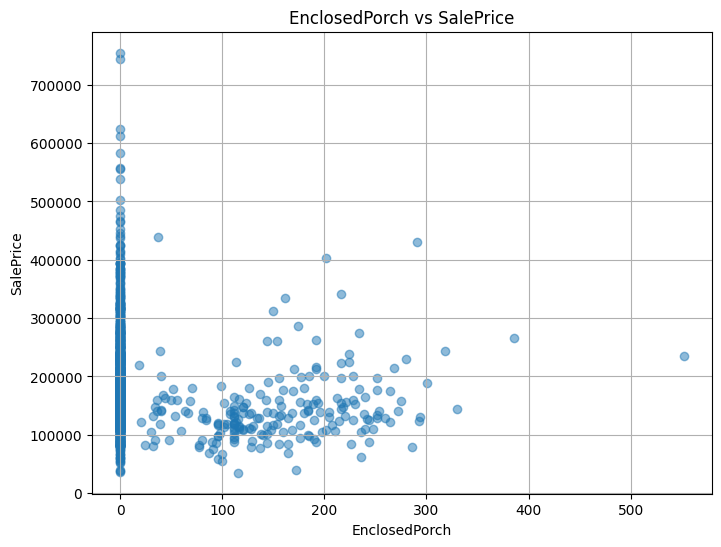

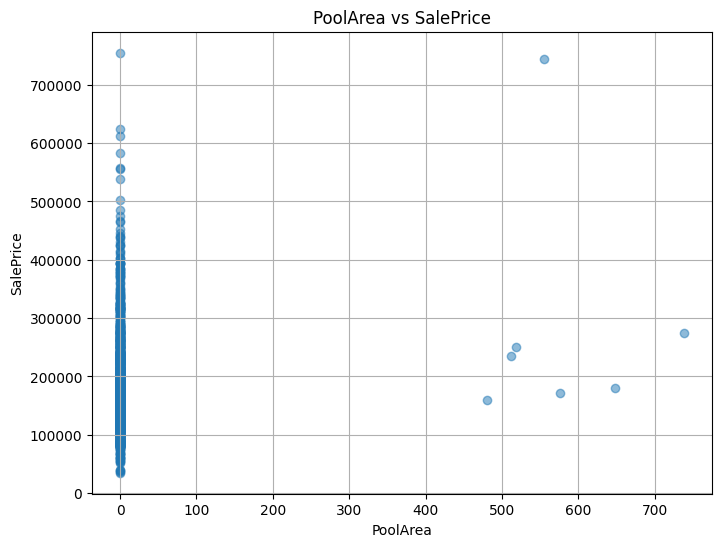

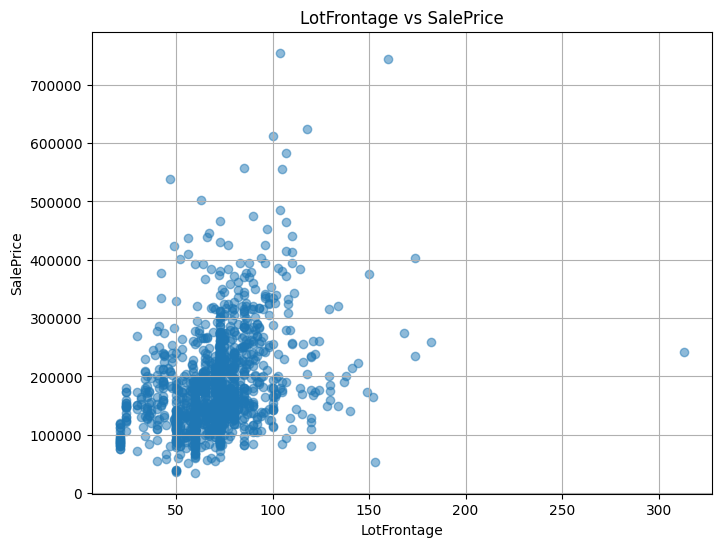

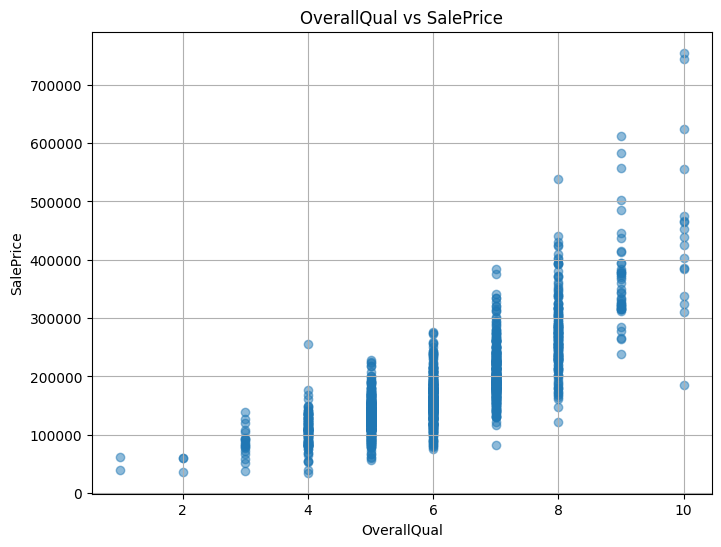

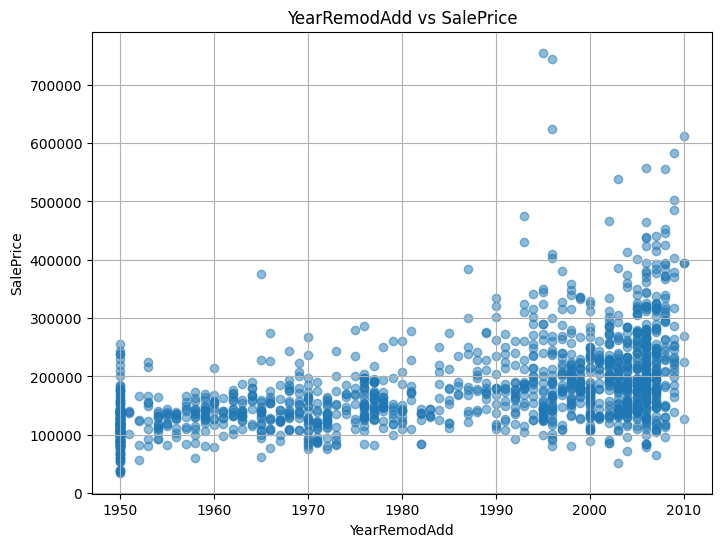

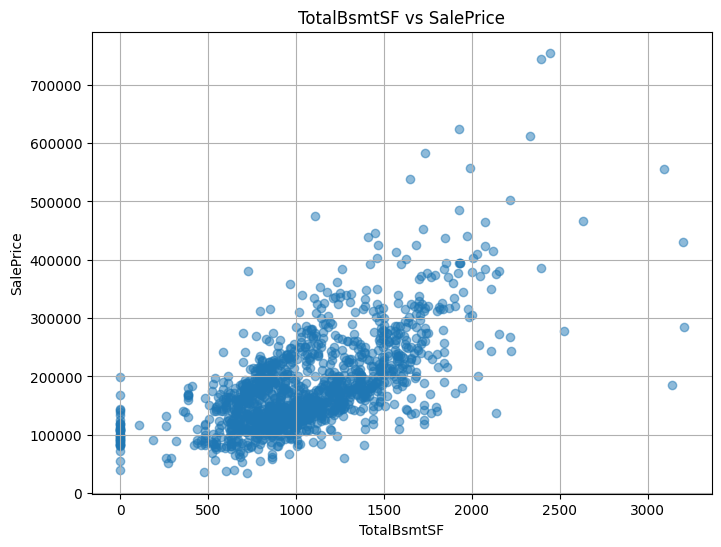

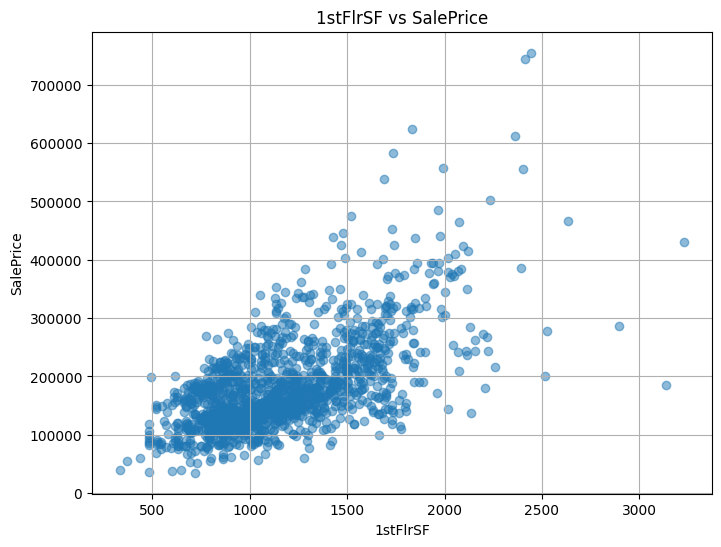

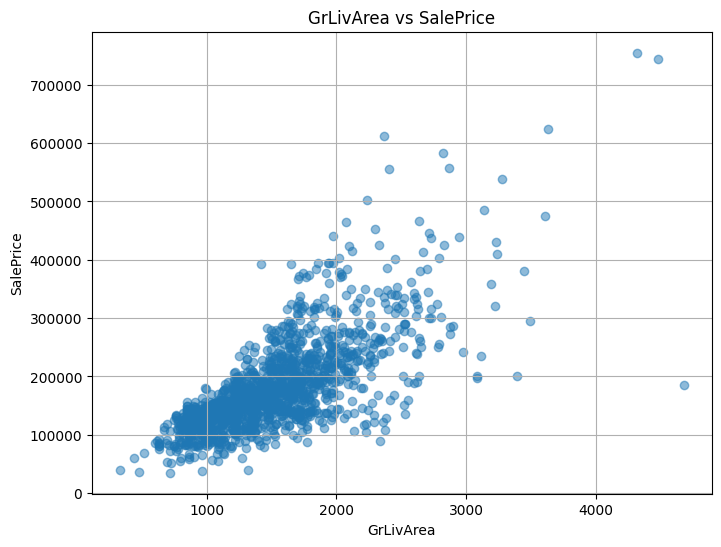

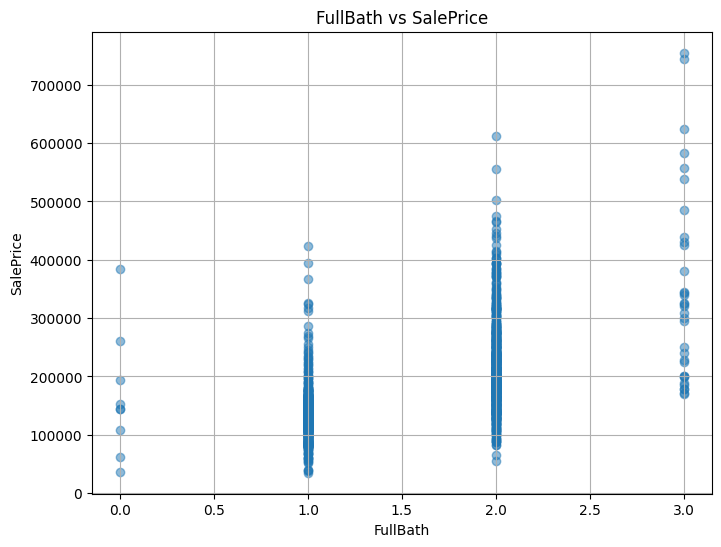

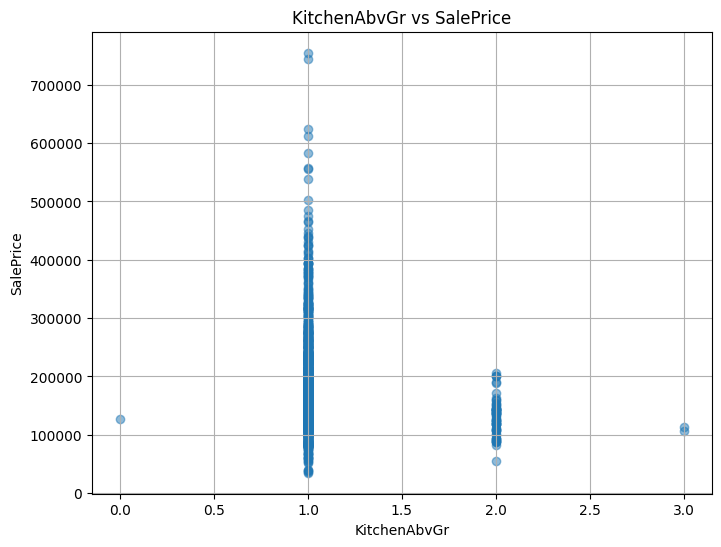

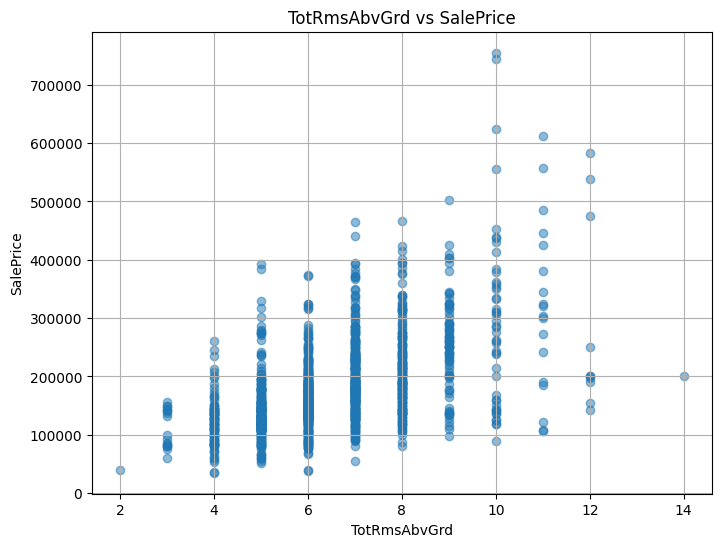

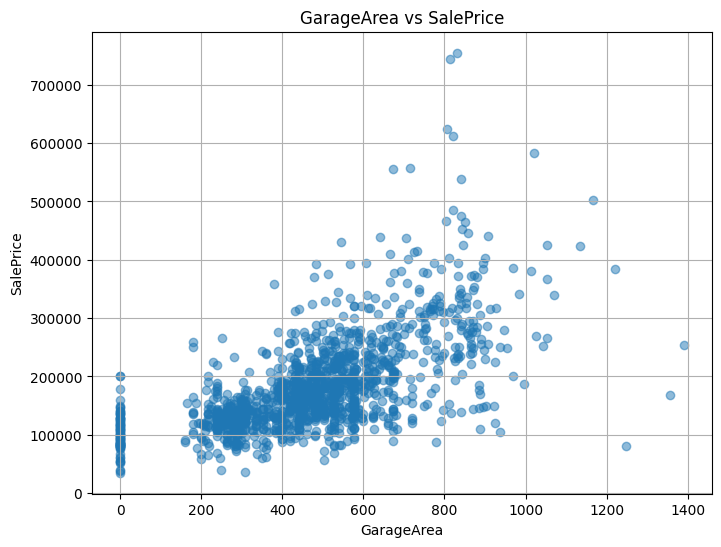

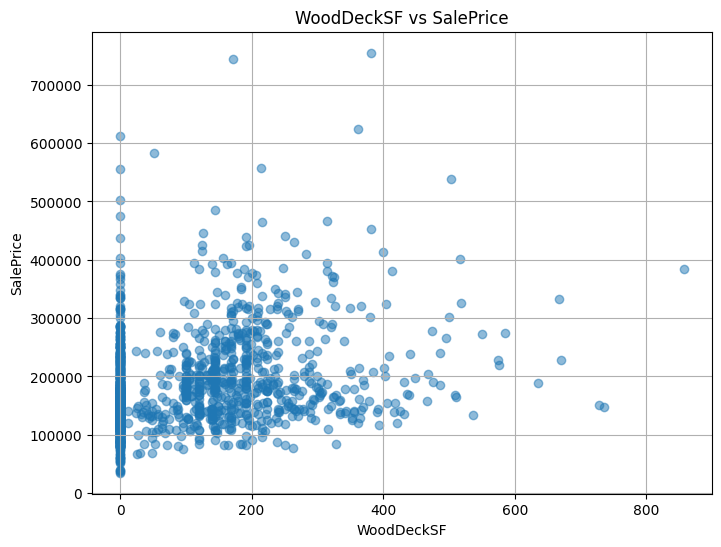

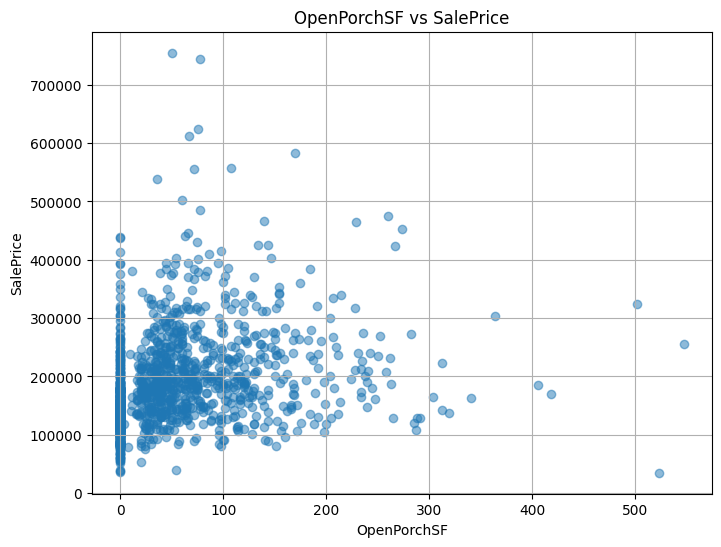

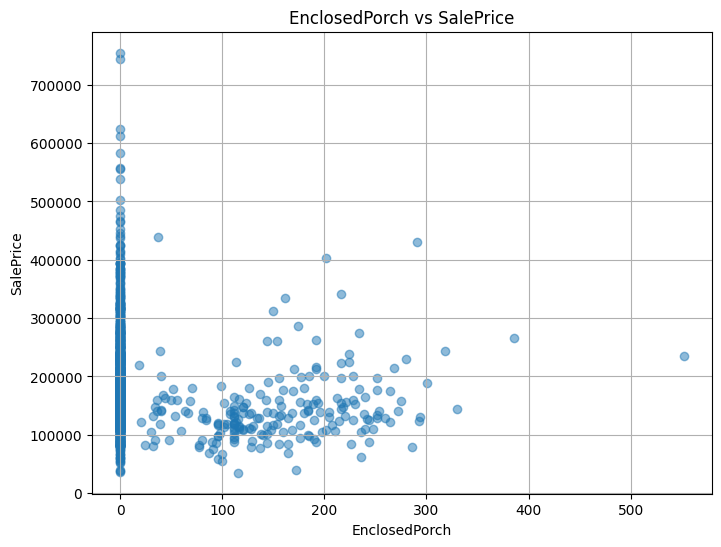

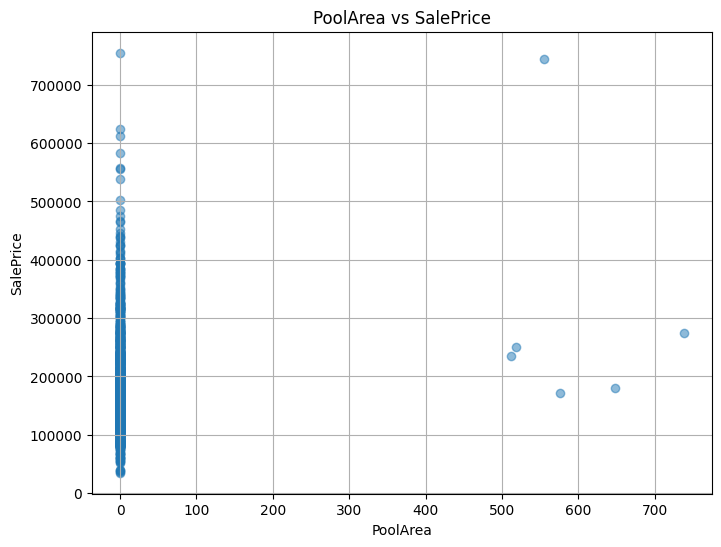

In [375]:
for feature in features:
    plt.figure(figsize=(8, 6))  # Define the size of the plot
    plt.scatter(Num_df[feature], Num_df['SalePrice'], alpha=0.5)  # Create a scatter plot
    plt.title(f'{feature} vs SalePrice')  # Set the title
    plt.xlabel(feature)  # Label for the x-axis
    plt.ylabel('SalePrice')  # Label for the y-axis
    plt.grid(True)  # Display gridlines
    plt.show()  # Show the plot

Juding by the graphs we can conclude:

Lot frontage : has 2 outliers we need to look at

Overall quality: very reasonable as the quality inc the price inc

YearRemodAdd: reasonable timeframe

TotalBsmtSf: there is one with >6000 we need to look at

1stFlrSF: one with>4000, wouldn't hurt but need to check

GRlivArea: same as above

Fullbath: reasonable data

Kitchen: kitchen is supposed to play a faactor in price so data is weird with it (need to check)

totRms: need to check the 14 rooms

GarageArea: need to check above 1200

woodDeckSF: need to check above 800

EnclosedPorch: need to check above 500

PoolArea: reasonable

salePrice: need to check >700k

In [376]:
Num_df.sort_values(by = 'LotFrontage', ascending = False)[:3]


LotFrontage  OverallQual  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
1298        313.0           10          2008         6110      4692   
934         313.0            7          2007          585      2069   
1127        182.0            7          2004         1530      1530   

      GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
1298       5642         2             1            12        1418         214   
934        2069         2             1             9         505           0   
1127       1530         2             1             7         630         144   

      OpenPorchSF  EnclosedPorch  PoolArea  SalePrice  
1298          292              0       480     160000  
934             0              0         0     242000  
1127           36              0         0     259000

LotFrontage  OverallQual  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
934         313.0            7          2007          585      2069   
1127        182.0            7          2004         1530      1530   
197         174.0            8          1990         1360      1360   

      GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
934        2069         2             1             9         505           0   
1127       1530         2             1             7         630         144   
197        3112         2             1             8         795           0   

      OpenPorchSF  EnclosedPorch  PoolArea  SalePrice  
934             0              0         0     242000  
1127           36              0         0     259000  
197            16            552       512     235000

The #1298 entry is very weird with Lotfrontage&TotalBsmtSF&1stFlr SF&GrLiv Area which outcomes a very small sale price, what is the reason?

need to check the original entry:


In [377]:
print(df_train[df_train['Id'] == 1299].head().to_string())
print(df_train[df_train['Id'] == 935].head().to_string())


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3         Bnk    AllPub   

this whole entry doesn't make any sense why the price would be so low so we choose to drop this entry #1299 but leave #935 makes more sense

In [378]:
Num_df = Num_df.drop(df_train[df_train['Id'] == 1299].index)
df_train=df_train.drop(df_train[df_train['Id'] == 1299].index)

In [379]:
Num_df.sort_values(by = 'SalePrice', ascending = False)[:3]


LotFrontage  OverallQual  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
691         104.0           10          1995         2444      2444   
1182        160.0           10          1996         2396      2411   
1169        118.0           10          1996         1930      1831   

      GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
691        4316         3             1            10         832         382   
1182       4476         3             1            10         813         171   
1169       3627         3             1            10         807         361   

      OpenPorchSF  EnclosedPorch  PoolArea  SalePrice  
691            50              0         0     755000  
1182           78              0       555     745000  
1169           76              0         0     625000

LotFrontage  OverallQual  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
691         104.0           10          1995         2444      2444   
1182        160.0           10          1996         2396      2411   
1169        118.0           10          1996         1930      1831   

      GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
691        4316         3             1            10         832         382   
1182       4476         3             1            10         813         171   
1169       3627         3             1            10         807         361   

      OpenPorchSF  EnclosedPorch  PoolArea  SalePrice  
691            50              0         0     755000  
1182           78              0       555     745000  
1169           76              0         0     625000

In [380]:
print(df_train[df_train['Id'] == 692].head().to_string())
print(df_train[df_train['Id'] == 1183	].head().to_string())



      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
691  692          60       RL        104.0    21535   Pave   NaN      IR1         Lvl    AllPub    Cor

Apparently the neighbourhood 'NoRdige' plays important role in price thats why they are so expensive so in order to check we do this :

In [381]:
test = df_train.loc[(df_train['Neighborhood'] == 'Noridge')]
test = df_train.sort_values(by = 'SalePrice', ascending = False)
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1169  1170          60       RL        118.0    35760   Pave   NaN      IR1   
898    899          20       RL        100.0    12919   Pave   NaN      IR1   
803    804          60       RL        107.0    13891   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   
1169         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
898          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
803          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
691       1   2007        WD         Normal     755000  
1182      7   2007        WD        Abnorml     745000  
1169      7   2006        WD         Normal     625000  
898       3   2010       New        Partial     611657  
803       1   2009       New        Partial     582933  

[5 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1169  1170          60       RL        118.0    35760   Pave   NaN      IR1   
898    899          20       RL        100.0    12919   Pave   NaN      IR1   
803    804          60       RL        107.0    13891   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   
1169         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
898          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
803          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
691       1   2007        WD         Normal     755000  
1182      7   2007        WD        Abnorml     745000  
1169      7   2006        WD         Normal     625000  
898       3   2010       New        Partial     611657  
803       1   2009       New        Partial     582933  

[5 rows x 81 columns]

Conclusion: leave price as it is & Neighborhood plays important role in saleprice

In [382]:
Num_df.head()

LotFrontage  OverallQual  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0         65.0            7          2003          856       856       1710   
1         80.0            6          1976         1262      1262       1262   
2         68.0            7          2002          920       920       1786   
3         60.0            7          1970          756       961       1717   
4         84.0            8          2000         1145      1145       2198   

   FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  OpenPorchSF  \
0         2             1             8         548           0           61   
1         2             1             6         460         298            0   
2         2             1             6         608           0           42   
3         1             1             7         642           0           35   
4         2             1             9         836         192           84   

   EnclosedPorch  PoolArea  SalePrice  
0              0         0     208500  
1              0         0     181500  
2              0         0     223500  
3            272         0     140000  
4              0         0     250000

LotFrontage  OverallQual  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0         65.0            7          2003          856       856       1710   
1         80.0            6          1976         1262      1262       1262   
2         68.0            7          2002          920       920       1786   
3         60.0            7          1970          756       961       1717   
4         84.0            8          2000         1145      1145       2198   

   FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  OpenPorchSF  \
0         2             1             8         548           0           61   
1         2             1             6         460         298            0   
2         2             1             6         608           0           42   
3         1             1             7         642           0           35   
4         2             1             9         836         192           84   

   EnclosedPorch  PoolArea  SalePrice  
0              0         0     208500  
1              0         0     181500  
2              0         0     223500  
3            272         0     140000  
4              0         0     250000

In [383]:
Num_df.shape

(1459, 15)

(1459, 15)

In [384]:
Num_df.isna().sum()

LotFrontage      259
OverallQual        0
YearRemodAdd       0
TotalBsmtSF        0
1stFlrSF           0
GrLivArea          0
FullBath           0
KitchenAbvGr       0
TotRmsAbvGrd       0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
PoolArea           0
SalePrice          0
dtype: int64

LotFrontage      0
OverallQual      0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenAbvGr     0
TotRmsAbvGrd     0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
PoolArea         0
SalePrice        0
dtype: int64

In [385]:
Num_df['LotFrontage'].describe()

count    1200.000000
mean       69.847500
std        23.258799
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

count    1459.000000
mean       70.407128
std        21.126410
min        21.000000
25%        60.000000
50%        73.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

Lot frontage cannot be NA since there has to be some distance between road & house so we fill the values raning from 60 to 80 which are 25% to 75% percentile of the data

In [386]:
Num_df['LotFrontage'].fillna(np.random.randint(60, 81), inplace=True)


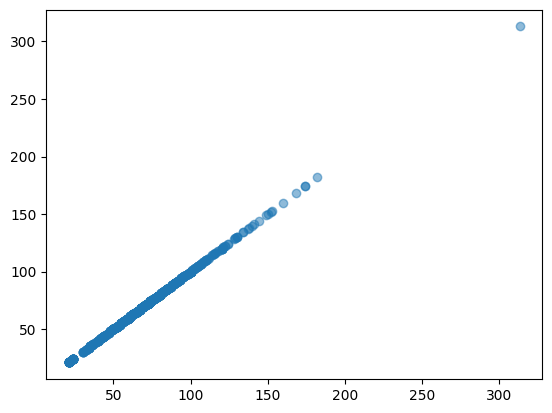

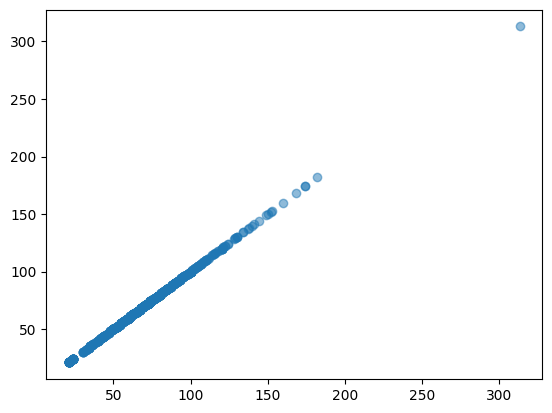

In [387]:
plt.scatter(Num_df['LotFrontage'],Num_df['LotFrontage'], alpha=0.5)

The Lot Frontage data is cleaner now and more reliable.

In [388]:
Num_df.isna().sum()

LotFrontage      0
OverallQual      0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenAbvGr     0
TotRmsAbvGrd     0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
PoolArea         0
SalePrice        0
dtype: int64

LotFrontage      0
OverallQual      0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenAbvGr     0
TotRmsAbvGrd     0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
PoolArea         0
SalePrice        0
dtype: int64

In [389]:
Num_df.duplicated().sum()

0

0

In [390]:
"""def identify_outliers(df, feature, iqr_multiplier=1.5):


  # Calculate the Q1 and Q3 for the feature.
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)

  # Calculate the IQR.
  iqr = q3 - q1

  # Identify any data points that are more than the specified multiplier of the IQR below Q1 or above Q3.
  outliers = (df[feature] < (q1 - iqr * iqr_multiplier)) | (df[feature] > (q3 + iqr * iqr_multiplier))

  # Return a list of indices of the outliers.
  return outliers.index

# Identify outliers in the Num_df DataFrame for each feature.
outliers = []
for i in Num_df.columns:
  outliers.extend(identify_outliers(Num_df, i))

  # Print the number of outliers identified for each feature.
  print('Number of outliers in {}: {}'.format(i, len(outliers)))
  outliers.clear"""

"def identify_outliers(df, feature, iqr_multiplier=1.5):\n\n\n  # Calculate the Q1 and Q3 for the feature.\n  q1 = df[feature].quantile(0.25)\n  q3 = df[feature].quantile(0.75)\n\n  # Calculate the IQR.\n  iqr = q3 - q1\n\n  # Identify any data points that are more than the specified multiplier of the IQR below Q1 or above Q3.\n  outliers = (df[feature] < (q1 - iqr * iqr_multiplier)) | (df[feature] > (q3 + iqr * iqr_multiplier))\n\n  # Return a list of indices of the outliers.\n  return outliers.index\n\n# Identify outliers in the Num_df DataFrame for each feature.\noutliers = []\nfor i in Num_df.columns:\n  outliers.extend(identify_outliers(Num_df, i))\n\n  # Print the number of outliers identified for each feature.\n  print('Number of outliers in {}: {}'.format(i, len(outliers)))\n  outliers.clear"

"def identify_outliers(df, feature, iqr_multiplier=1.5):\n\n\n  # Calculate the Q1 and Q3 for the feature.\n  q1 = df[feature].quantile(0.25)\n  q3 = df[feature].quantile(0.75)\n\n  # Calculate the IQR.\n  iqr = q3 - q1\n\n  # Identify any data points that are more than the specified multiplier of the IQR below Q1 or above Q3.\n  outliers = (df[feature] < (q1 - iqr * iqr_multiplier)) | (df[feature] > (q3 + iqr * iqr_multiplier))\n\n  # Return a list of indices of the outliers.\n  return outliers.index\n\n# Identify outliers in the Num_df DataFrame for each feature.\noutliers = []\nfor i in Num_df.columns:\n  outliers.extend(identify_outliers(Num_df, i))\n\n  # Print the number of outliers identified for each feature.\n  print('Number of outliers in {}: {}'.format(i, len(outliers)))\n  outliers.clear"

In [391]:
"""duplicated_values = Num_df.duplicated()

# Filter the DataFrame for duplicated rows.
filtered_df = Num_df[duplicated_values]

# View the duplicated rows.
filtered_df"""

'duplicated_values = Num_df.duplicated()\n\n# Filter the DataFrame for duplicated rows.\nfiltered_df = Num_df[duplicated_values]\n\n# View the duplicated rows.\nfiltered_df'

'duplicated_values = Num_df.duplicated()\n\n# Filter the DataFrame for duplicated rows.\nfiltered_df = Num_df[duplicated_values]\n\n# View the duplicated rows.\nfiltered_df'

# Classification Data Exploration

In [392]:
def w(df):
    return df.select_dtypes(include=['object'])

In [393]:
cat_df=w(df_train)

In [394]:
cat_df.shape

(1459, 43)

(1459, 43)

In [395]:
cat_df.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [396]:
cat_df['SalePrice']=Num_df['SalePrice']

In [397]:
#cat_df = pd.([cat_df], axis=1)
cat_df.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageFinish GarageQual GarageCond PavedDrive  \
0      CollgCr       Norm  ...          RFn         TA         TA          Y   
1      Veenker      Feedr  ...          RFn         TA         TA          Y   
2      CollgCr       Norm  ...          RFn         TA         TA          Y   
3      Crawfor       Norm  ...          Unf         TA         TA          Y   
4      NoRidge       Norm  ...          RFn         TA         TA          Y   

  PoolQC Fence MiscFeature SaleType SaleCondition SalePrice  
0    NaN   NaN         NaN       WD        Normal    208500  
1    NaN   NaN         NaN       WD        Normal    181500  
2    NaN   NaN         NaN       WD        Normal    223500  
3    NaN   NaN         NaN       WD       Abnorml    140000  
4    NaN   NaN         NaN       WD        Normal    250000  

[5 rows x 44 columns]

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageFinish GarageQual GarageCond PavedDrive  \
0      CollgCr       Norm  ...          RFn         TA         TA          Y   
1      Veenker      Feedr  ...          RFn         TA         TA          Y   
2      CollgCr       Norm  ...          RFn         TA         TA          Y   
3      Crawfor       Norm  ...          Unf         TA         TA          Y   
4      NoRidge       Norm  ...          RFn         TA         TA          Y   

  PoolQC Fence MiscFeature SaleType SaleCondition SalePrice  
0    NaN   NaN         NaN       WD        Normal    208500  
1    NaN   NaN         NaN       WD        Normal    181500  
2    NaN   NaN         NaN       WD        Normal    223500  
3    NaN   NaN         NaN       WD       Abnorml    140000  
4    NaN   NaN         NaN       WD        Normal    250000  

[5 rows x 44 columns]

In [398]:
cat_df.nunique()

MSZoning           5
Street             2
Alley              2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         8
BldgType           5
HouseStyle         8
RoofStyle          6
RoofMatl           7
Exterior1st       15
Exterior2nd       16
MasVnrType         4
ExterQual          4
ExterCond          5
Foundation         6
BsmtQual           4
BsmtCond           4
BsmtExposure       4
BsmtFinType1       6
BsmtFinType2       6
Heating            6
HeatingQC          5
CentralAir         2
Electrical         5
KitchenQual        4
Functional         7
FireplaceQu        5
GarageType         6
GarageFinish       3
GarageQual         5
GarageCond         5
PavedDrive         3
PoolQC             3
Fence              4
MiscFeature        4
SaleType           9
SaleCondition      6
SalePrice        663
dtype: int64

MSZoning           5
Street             2
Alley              2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         8
BldgType           5
HouseStyle         8
RoofStyle          6
RoofMatl           7
Exterior1st       15
Exterior2nd       16
MasVnrType         4
ExterQual          4
ExterCond          5
Foundation         6
BsmtQual           4
BsmtCond           4
BsmtExposure       4
BsmtFinType1       6
BsmtFinType2       6
Heating            6
HeatingQC          5
CentralAir         2
Electrical         5
KitchenQual        4
Functional         7
FireplaceQu        5
GarageType         6
GarageFinish       3
GarageQual         5
GarageCond         5
PavedDrive         3
PoolQC             3
Fence              4
MiscFeature        4
SaleType           9
SaleCondition      6
SalePrice        663
dtype: int64


Nominal categorical variables are variables that can be classified into categories, but the categories have no natural order. For example, eye color, country of origin, and blood type are all nominal categorical variables.

Ordinal categorical variables are variables that can be classified into categories, and the categories have a natural order. For example, survey responses on a scale of 1 to 5, or customer satisfaction ratings, are all ordinal categorical variables.

-> so we use chi-squared test for our nominal variables

In [399]:
cat_df.isna().sum()

MSZoning            0
Street              0
Alley            1368
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1178
MiscFeature      1405
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

MSZoning            0
Street              0
Alley            1368
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1178
MiscFeature      1405
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

'Alley' , 'PoolQC' , 'Fence' , 'MiscFeature' are mostly nulls so we drop them for irrelevance           

In [400]:
cat_df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [401]:
from scipy.stats import chi2_contingency

P_valuesAll = []
for i in cat_df.columns:
    contingency_table = pd.crosstab(cat_df[i], cat_df['SalePrice'])

    chi2, p, _, _ = chi2_contingency(contingency_table)

    #print("Contingency Table:")
    #print(contingency_table)


    if p <= 0.05:
        print(i)
        #print(f"Chi-Squared Statistic: {chi2}")
        #print(f"P-Value: {p}")
        P_valuesAll.append([i,chi2,p])

#print(P_values)
print(len(P_valuesAll))

MSZoning
Street
LotShape
LotConfig
Neighborhood
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
Heating
CentralAir
KitchenQual
FireplaceQu
GarageFinish
GarageQual
SaleType
SaleCondition
SalePrice
21
MSZoning
Street
LotShape
LotConfig
Neighborhood
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
Heating
CentralAir
KitchenQual
FireplaceQu
GarageFinish
GarageQual
SaleType
SaleCondition
SalePrice
21


We can take these categorical in to consideration and drop the rest, some of these have NA values but we will leave it as it is since it means NA== isn't available and it affects the price

In [402]:
cat_df = cat_df[['MSZoning',
                   'Street',
                   'LotShape',
                   'LotConfig',
                   'Neighborhood',
                   'MasVnrType',
                   'ExterQual',
                   'ExterCond',
                   'Foundation',
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'Heating',
                   'CentralAir',
                   'KitchenQual',
                   'FireplaceQu',
                   'GarageFinish',
                   'GarageQual',
                   'SaleType',
                   'SaleCondition',
                   'SalePrice']]

In [403]:
cat_df.head()

MSZoning Street LotShape LotConfig Neighborhood MasVnrType ExterQual  \
0       RL   Pave      Reg    Inside      CollgCr    BrkFace        Gd   
1       RL   Pave      Reg       FR2      Veenker       None        TA   
2       RL   Pave      IR1    Inside      CollgCr    BrkFace        Gd   
3       RL   Pave      IR1    Corner      Crawfor       None        TA   
4       RL   Pave      IR1       FR2      NoRidge    BrkFace        Gd   

  ExterCond Foundation BsmtQual  ... BsmtExposure Heating CentralAir  \
0        TA      PConc       Gd  ...           No    GasA          Y   
1        TA     CBlock       Gd  ...           Gd    GasA          Y   
2        TA      PConc       Gd  ...           Mn    GasA          Y   
3        TA     BrkTil       TA  ...           No    GasA          Y   
4        TA      PConc       Gd  ...           Av    GasA          Y   

  KitchenQual FireplaceQu GarageFinish GarageQual SaleType SaleCondition  \
0          Gd         NaN          RFn         TA       WD        Normal   
1          TA          TA          RFn         TA       WD        Normal   
2          Gd          TA          RFn         TA       WD        Normal   
3          Gd          Gd          Unf         TA       WD       Abnorml   
4          Gd          TA          RFn         TA       WD        Normal   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 21 columns]

MSZoning Street LotShape LotConfig Neighborhood MasVnrType ExterQual  \
0       RL   Pave      Reg    Inside      CollgCr    BrkFace        Gd   
1       RL   Pave      Reg       FR2      Veenker       None        TA   
2       RL   Pave      IR1    Inside      CollgCr    BrkFace        Gd   
3       RL   Pave      IR1    Corner      Crawfor       None        TA   
4       RL   Pave      IR1       FR2      NoRidge    BrkFace        Gd   

  ExterCond Foundation BsmtQual  ... BsmtExposure Heating CentralAir  \
0        TA      PConc       Gd  ...           No    GasA          Y   
1        TA     CBlock       Gd  ...           Gd    GasA          Y   
2        TA      PConc       Gd  ...           Mn    GasA          Y   
3        TA     BrkTil       TA  ...           No    GasA          Y   
4        TA      PConc       Gd  ...           Av    GasA          Y   

  KitchenQual FireplaceQu GarageFinish GarageQual SaleType SaleCondition  \
0          Gd         NaN          RFn         TA       WD        Normal   
1          TA          TA          RFn         TA       WD        Normal   
2          Gd          TA          RFn         TA       WD        Normal   
3          Gd          Gd          Unf         TA       WD       Abnorml   
4          Gd          TA          RFn         TA       WD        Normal   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 21 columns]

In [404]:
one_hot_encoded_data = pd.get_dummies(cat_df)
one_hot_encoded_data.head()

SalePrice  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0     208500                 0            0            0            1   
1     181500                 0            0            0            1   
2     223500                 0            0            0            1   
3     140000                 0            0            0            1   
4     250000                 0            0            0            1   

   MSZoning_RM  Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  ...  \
0            0            0            1             0             0  ...   
1            0            0            1             0             0  ...   
2            0            0            1             1             0  ...   
3            0            0            1             1             0  ...   
4            0            0            1             1             0  ...   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 113 columns]

SalePrice  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0     208500                 0            0            0            1   
1     181500                 0            0            0            1   
2     223500                 0            0            0            1   
3     140000                 0            0            0            1   
4     250000                 0            0            0            1   

   MSZoning_RM  Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  ...  \
0            0            0            1             0             0  ...   
1            0            0            1             0             0  ...   
2            0            0            1             1             0  ...   
3            0            0            1             1             0  ...   
4            0            0            1             1             0  ...   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 113 columns]

# Whole Data

In [405]:
data = pd.concat([one_hot_encoded_data, Num_df], axis=1)

In [406]:
data = data.iloc[:,1:]
data.head(-1)

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                    0            0            0            1            0   
1                    0            0            0            1            0   
2                    0            0            0            1            0   
3                    0            0            0            1            0   
4                    0            0            0            1            0   
...                ...          ...          ...          ...          ...   
1454                 0            1            0            0            0   
1455                 0            0            0            1            0   
1456                 0            0            0            1            0   
1457                 0            0            0            1            0   
1458                 0            0            0            1            0   

      Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0               0            1             0             0             0  ...   
1               0            1             0             0             0  ...   
2               0            1             1             0             0  ...   
3               0            1             1             0             0  ...   
4               0            1             1             0             0  ...   
...           ...          ...           ...           ...           ...  ...   
1454            0            1             0             0             0  ...   
1455            0            1             0             0             0  ...   
1456            0            1             0             0             0  ...   
1457            0            1             0             0             0  ...   
1458            0            1             0             0             0  ...   

      GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
0          1710         2             1             8         548           0   
1          1262         2             1             6         460         298   
2          1786         2             1             6         608           0   
3          1717         1             1             7         642           0   
4          2198         2             1             9         836         192   
...         ...       ...           ...           ...         ...         ...   
1454       1221         2             1             6         400           0   
1455       1647         2             1             7         460           0   
1456       2073         2             1             7         500         349   
1457       2340         2             1             9         252           0   
1458       1078         1             1             5         240         366   

      OpenPorchSF  EnclosedPorch  PoolArea  SalePrice  
0              61              0         0     208500  
1               0              0         0     181500  
2              42              0         0     223500  
3              35            272         0     140000  
4              84              0         0     250000  
...           ...            ...       ...        ...  
1454          113              0         0     185000  
1455           40              0         0     175000  
1456            0              0         0     210000  
1457           60              0         0     266500  
1458            0            112         0     142125  

[1458 rows x 127 columns]

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                    0            0            0            1            0   
1                    0            0            0            1            0   
2                    0            0            0            1            0   
3                    0            0            0            1            0   
4                    0            0            0            1            0   
...                ...          ...          ...          ...          ...   
1454                 0            1            0            0            0   
1455                 0            0            0            1            0   
1456                 0            0            0            1            0   
1457                 0            0            0            1            0   
1458                 0            0            0            1            0   

      Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0               0            1             0             0             0  ...   
1               0            1             0             0             0  ...   
2               0            1             1             0             0  ...   
3               0            1             1             0             0  ...   
4               0            1             1             0             0  ...   
...           ...          ...           ...           ...           ...  ...   
1454            0            1             0             0             0  ...   
1455            0            1             0             0             0  ...   
1456            0            1             0             0             0  ...   
1457            0            1             0             0             0  ...   
1458            0            1             0             0             0  ...   

      GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
0          1710         2             1             8         548           0   
1          1262         2             1             6         460         298   
2          1786         2             1             6         608           0   
3          1717         1             1             7         642           0   
4          2198         2             1             9         836         192   
...         ...       ...           ...           ...         ...         ...   
1454       1221         2             1             6         400           0   
1455       1647         2             1             7         460           0   
1456       2073         2             1             7         500         349   
1457       2340         2             1             9         252           0   
1458       1078         1             1             5         240         366   

      OpenPorchSF  EnclosedPorch  PoolArea  SalePrice  
0              61              0         0     208500  
1               0              0         0     181500  
2              42              0         0     223500  
3              35            272         0     140000  
4              84              0         0     250000  
...           ...            ...       ...        ...  
1454          113              0         0     185000  
1455           40              0         0     175000  
1456            0              0         0     210000  
1457           60              0         0     266500  
1458            0            112         0     142125  

[1458 rows x 127 columns]

In [407]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]


In [408]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [409]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train,columns=[data.columns[:-1]])
X_test=pd.DataFrame(X_test,columns=[data.columns[:-1]])
X_test.head(-1)

MSZoning_C (all) MSZoning_FV MSZoning_RH MSZoning_RL MSZoning_RM  \
0                0.0         0.0         0.0         1.0         0.0   
1                0.0         0.0         0.0         1.0         0.0   
2                0.0         0.0         0.0         1.0         0.0   
3                0.0         0.0         0.0         1.0         0.0   
4                0.0         0.0         0.0         0.0         1.0   
..               ...         ...         ...         ...         ...   
286              0.0         0.0         0.0         1.0         0.0   
287              0.0         0.0         0.0         1.0         0.0   
288              0.0         0.0         0.0         1.0         0.0   
289              0.0         0.0         0.0         1.0         0.0   
290              0.0         0.0         0.0         1.0         0.0   

    Street_Grvl Street_Pave LotShape_IR1 LotShape_IR2 LotShape_IR3  ...  \
0           0.0         0.0          0.0          0.0          0.0  ...   
1           0.0         0.0          0.0          0.0          0.0  ...   
2           0.0         0.0          1.0          0.0          0.0  ...   
3           0.0         0.0          0.0          0.0          0.0  ...   
4           0.0         0.0          0.0          0.0          0.0  ...   
..          ...         ...          ...          ...          ...  ...   
286         0.0         0.0          1.0          0.0          0.0  ...   
287         0.0         0.0          1.0          0.0          0.0  ...   
288         0.0         0.0          1.0          0.0          0.0  ...   
289         0.0         0.0          1.0          0.0          0.0  ...   
290         0.0         0.0          1.0          0.0          0.0  ...   

     1stFlrSF GrLivArea  FullBath KitchenAbvGr TotRmsAbvGrd GarageArea  \
0    0.555763  0.282325  0.666667          0.0        0.375   0.668430   
1    0.291181  0.134515  0.333333          0.0        0.375   0.000000   
2    0.966869  1.000000  1.000000          0.0        0.875   0.733686   
3    0.311713  0.324557  0.666667          0.0        0.375   0.485009   
4    0.162389  0.209593  0.333333          0.0        0.250   0.211640   
..        ...       ...       ...          ...          ...        ...   
286  0.398507  0.194473  0.666667          0.0        0.375   0.652557   
287  0.491367  0.246350  0.666667          0.0        0.500   0.507937   
288  0.164722  0.260428  0.666667          0.0        0.375   0.418871   
289  0.270649  0.123045  0.333333          0.0        0.125   0.249559   
290  0.424172  0.327946  0.666667          0.0        0.500   0.324515   

    WoodDeckSF OpenPorchSF EnclosedPorch PoolArea  
0     0.215569    0.197211      0.000000      0.0  
1     0.215569    0.000000      0.000000      0.0  
2     0.571856    0.099602      0.000000      0.0  
3     0.000000    0.175299      0.559585      0.0  
4     0.000000    0.069721      0.000000      0.0  
..         ...         ...           ...      ...  
286   0.000000    0.071713      0.000000      0.0  
287   0.000000    0.000000      0.000000      0.0  
288   0.000000    0.087649      0.000000      0.0  
289   0.000000    0.000000      0.000000      0.0  
290   0.082335    0.000000      0.000000      0.0  

[291 rows x 126 columns]

MSZoning_C (all) MSZoning_FV MSZoning_RH MSZoning_RL MSZoning_RM  \
0                0.0         0.0         0.0         1.0         0.0   
1                0.0         0.0         0.0         0.0         1.0   
2                0.0         0.0         0.0         0.0         1.0   
3                0.0         0.0         0.0         1.0         0.0   
4                0.0         0.0         0.0         1.0         0.0   
..               ...         ...         ...         ...         ...   
286              0.0         0.0         0.0         1.0         0.0   
287              0.0         0.0         0.0         1.0         0.0   
288              0.0         0.0         0.0         1.0         0.0   
289              0.0         0.0         0.0         1.0         0.0   
290              0.0         0.0         0.0         1.0         0.0   

    Street_Grvl Street_Pave LotShape_IR1 LotShape_IR2 LotShape_IR3  ...  \
0           0.0         1.0          0.0          1.0          0.0  ...   
1           0.0         1.0          0.0          0.0          0.0  ...   
2           0.0         1.0          0.0          0.0          0.0  ...   
3           0.0         1.0          0.0          0.0          0.0  ...   
4           0.0         1.0          1.0          0.0          0.0  ...   
..          ...         ...          ...          ...          ...  ...   
286         0.0         1.0          0.0          0.0          0.0  ...   
287         0.0         1.0          0.0          0.0          0.0  ...   
288         0.0         1.0          0.0          0.0          0.0  ...   
289         0.0         1.0          0.0          0.0          0.0  ...   
290         0.0         1.0          0.0          0.0          0.0  ...   

     1stFlrSF GrLivArea  FullBath KitchenAbvGr TotRmsAbvGrd GarageArea  \
0    0.338033  0.427088  1.000000          0.5     0.777778   0.288462   
1    0.438178  0.534355  0.666667          0.5     0.555556   0.416667   
2    0.253073  0.109244  0.333333          0.5     0.222222   0.420673   
3    0.309834  0.148047  0.333333          0.5     0.333333   0.227564   
4    0.286334  0.405339  0.666667          0.5     0.666667   0.537660   
..        ...       ...       ...          ...          ...        ...   
286  0.324295  0.157934  0.666667          0.5     0.333333   0.344551   
287  0.438178  0.235788  0.666667          1.0     0.555556   0.634615   
288  0.573753  0.328473  1.000000          1.0     0.666667   0.613782   
289  0.299349  0.140880  1.000000          0.5     0.222222   0.000000   
290  0.452639  0.245675  0.666667          0.5     0.222222   0.606571   

    WoodDeckSF OpenPorchSF EnclosedPorch PoolArea  
0     0.725373    0.073126      0.000000      0.0  
1     0.000000    1.000000      0.000000      0.0  
2     0.000000    0.051188      0.000000      0.0  
3     0.000000    0.000000      0.000000      0.0  
4     0.197015    0.104205      0.000000      0.0  
..         ...         ...           ...      ...  
286   0.217910    0.036563      0.000000      0.0  
287   0.000000    0.277879      0.000000      0.0  
288   0.000000    0.000000      0.000000      0.0  
289   0.179104    0.000000      0.000000      0.0  
290   0.000000    0.208410      0.347826      0.0  

[291 rows x 126 columns]

In [410]:
X_test.to_csv('X_test.csv', index=False)

# XG Boost Regressor

In [411]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

# Create an XGBClassifier object
model = XGBRegressor(learning_rate=0.07, n_estimators=500, max_depth = 3)

# Fit the XGBClassifier object to the training data
model.fit(X_train, y_train)

# Evaluate the XGBClassifier object on the test data
y_pred = model.predict(X_test)



In [412]:
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
rms=(mse**(1/2))
print('RootMean squared error:', rms)

r_squared = r2_score(y_test, y_pred)
print('R2 Score:',r_squared)

RootMean squared error: 33041.759022408805
R2 Score: 0.8459865003010031
RootMean squared error: 43300.334372075544
R2 Score: 0.7142535474226197


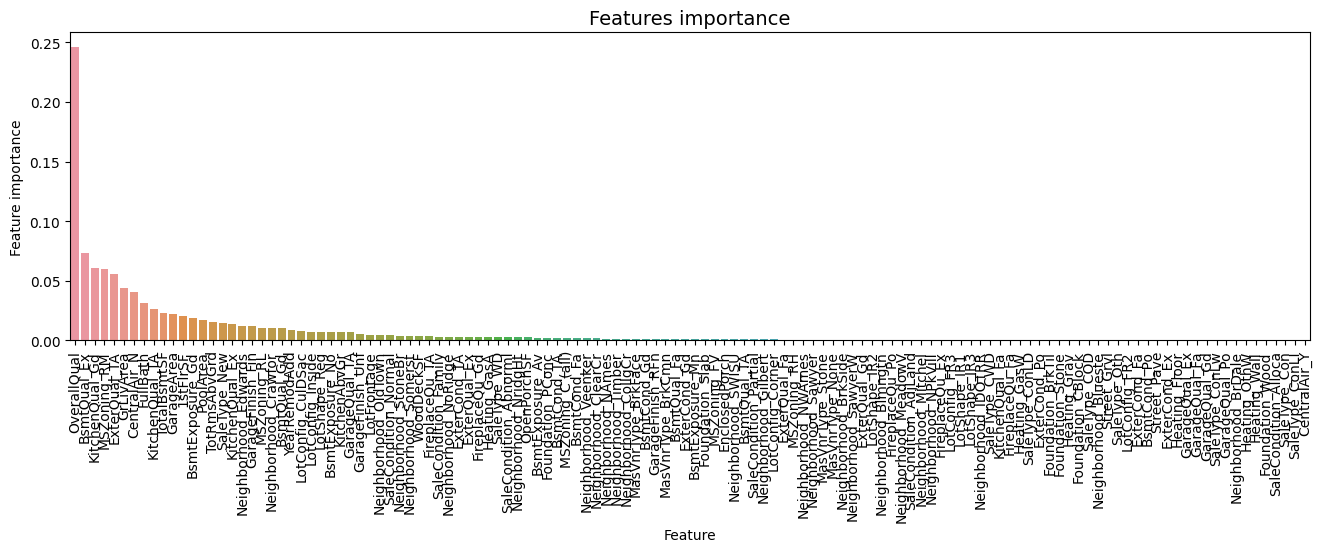

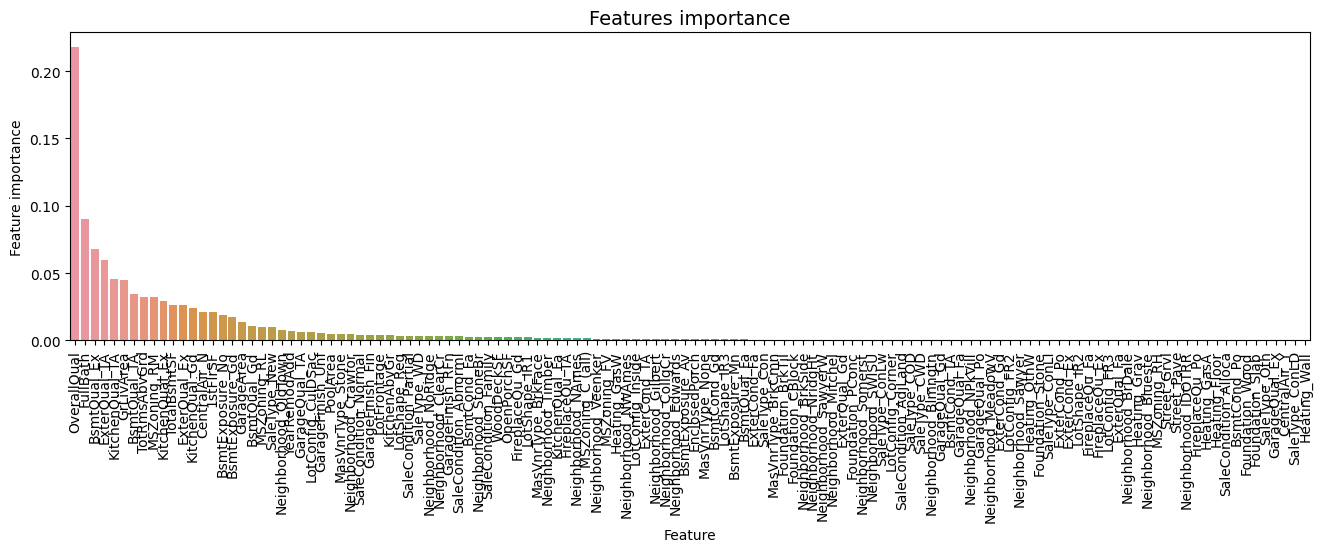

In [413]:
tmp = pd.DataFrame({'Feature': data.columns[:-1], 'Feature importance': model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

# ---------------------------------------
# -------------------------------------

In [414]:
data.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             0             0             0  ...   
2            0            1             1             0             0  ...   
3            0            1             1             0             0  ...   
4            0            1             1             0             0  ...   

   GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
0       1710         2             1             8         548           0   
1       1262         2             1             6         460         298   
2       1786         2             1             6         608           0   
3       1717         1             1             7         642           0   
4       2198         2             1             9         836         192   

   OpenPorchSF  EnclosedPorch  PoolArea  SalePrice  
0           61              0         0     208500  
1            0              0         0     181500  
2           42              0         0     223500  
3           35            272         0     140000  
4           84              0         0     250000  

[5 rows x 127 columns]

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             0             0             0  ...   
2            0            1             1             0             0  ...   
3            0            1             1             0             0  ...   
4            0            1             1             0             0  ...   

   GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
0       1710         2             1             8         548           0   
1       1262         2             1             6         460         298   
2       1786         2             1             6         608           0   
3       1717         1             1             7         642           0   
4       2198         2             1             9         836         192   

   OpenPorchSF  EnclosedPorch  PoolArea  SalePrice  
0           61              0         0     208500  
1            0              0         0     181500  
2           42              0         0     223500  
3           35            272         0     140000  
4           84              0         0     250000  

[5 rows x 127 columns]

In [415]:
cat_df = test_full[['MSZoning',
                   'Street',
                   'LotShape',
                   'LotConfig',
                   'Neighborhood',
                   'MasVnrType',
                   'ExterQual',
                   'ExterCond',
                   'Foundation',
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'Heating',
                   'CentralAir',
                   'KitchenQual',
                   'FireplaceQu',
                   'GarageFinish',
                   'GarageQual',
                   'SaleType',
                   'SaleCondition'
                   ]]

In [416]:
one_hot_encoded_data = pd.get_dummies(cat_df)
one_hot_encoded_data.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            1            0            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             1             0             0  ...   
2            0            1             1             0             0  ...   
3            0            1             1             0             0  ...   
4            0            1             1             0             0  ...   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      0                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     1                      0  
4                     0                     1                      0  

[5 rows x 109 columns]

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            1            0            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             1             0             0  ...   
2            0            1             1             0             0  ...   
3            0            1             1             0             0  ...   
4            0            1             1             0             0  ...   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      0                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     1                      0  
4                     0                     1                      0  

[5 rows x 109 columns]

In [417]:
desired_columns = ['LotFrontage', 'OverallQual', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea']

In [418]:
test_data_test=test_full[desired_columns]

In [419]:
test_encoded=pd.concat([one_hot_encoded_data, test_data_test], axis=1)
test_encoded.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            1            0            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             1             0             0  ...   
2            0            1             1             0             0  ...   
3            0            1             1             0             0  ...   
4            0            1             1             0             0  ...   

   1stFlrSF  GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  \
0       896        896         1             1             5       730.0   
1      1329       1329         1             1             6       312.0   
2       928       1629         2             1             6       482.0   
3       926       1604         2             1             7       470.0   
4      1280       1280         2             1             5       506.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  PoolArea  
0         140            0              0         0  
1         393           36              0         0  
2         212           34              0         0  
3         360           36              0         0  
4           0           82              0         0  

[5 rows x 123 columns]

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            1            0            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             1             0             0  ...   
2            0            1             1             0             0  ...   
3            0            1             1             0             0  ...   
4            0            1             1             0             0  ...   

   1stFlrSF  GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  \
0       896        896         1             1             5       730.0   
1      1329       1329         1             1             6       312.0   
2       928       1629         2             1             6       482.0   
3       926       1604         2             1             7       470.0   
4      1280       1280         2             1             5       506.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  PoolArea  
0         140            0              0         0  
1         393           36              0         0  
2         212           34              0         0  
3         360           36              0         0  
4           0           82              0         0  

[5 rows x 123 columns]

In [420]:
print(test_encoded.shape)

(1459, 123)
(1459, 123)


In [421]:
columnnames=[test_encoded.columns]

In [422]:
"""test_encoded.head()"""

'test_encoded.head()'

'test_encoded.head()'

In [423]:
test_encoded = scaler.fit_transform(test_encoded)
test_encoded=pd.DataFrame(test_encoded,columns=columnnames)
test_encoded.head(-1)

MSZoning_C (all) MSZoning_FV MSZoning_RH MSZoning_RL MSZoning_RM  \
0                 0.0         0.0         1.0         0.0         0.0   
1                 0.0         0.0         0.0         1.0         0.0   
2                 0.0         0.0         0.0         1.0         0.0   
3                 0.0         0.0         0.0         1.0         0.0   
4                 0.0         0.0         0.0         1.0         0.0   
...               ...         ...         ...         ...         ...   
1453              0.0         0.0         0.0         0.0         1.0   
1454              0.0         0.0         0.0         0.0         1.0   
1455              0.0         0.0         0.0         0.0         1.0   
1456              0.0         0.0         0.0         1.0         0.0   
1457              0.0         0.0         0.0         1.0         0.0   

     Street_Grvl Street_Pave LotShape_IR1 LotShape_IR2 LotShape_IR3  ...  \
0            0.0         1.0          0.0          0.0          0.0  ...   
1            0.0         1.0          1.0          0.0          0.0  ...   
2            0.0         1.0          1.0          0.0          0.0  ...   
3            0.0         1.0          1.0          0.0          0.0  ...   
4            0.0         1.0          1.0          0.0          0.0  ...   
...          ...         ...          ...          ...          ...  ...   
1453         0.0         1.0          0.0          0.0          0.0  ...   
1454         0.0         1.0          0.0          0.0          0.0  ...   
1455         0.0         1.0          0.0          0.0          0.0  ...   
1456         0.0         1.0          0.0          0.0          0.0  ...   
1457         0.0         1.0          0.0          0.0          0.0  ...   

      1stFlrSF GrLivArea FullBath KitchenAbvGr TotRmsAbvGrd GarageArea  \
0     0.104309  0.104309     0.25          0.5     0.166667   0.490591   
1     0.196672  0.196672     0.25          0.5     0.250000   0.209677   
2     0.111135  0.260666     0.50          0.5     0.250000   0.323925   
3     0.110708  0.255333     0.50          0.5     0.333333   0.315860   
4     0.186220  0.186220     0.50          0.5     0.166667   0.340054   
...        ...       ...      ...          ...          ...        ...   
1453  0.029650  0.146118     0.25          0.5     0.166667   0.000000   
1454  0.029650  0.146118     0.25          0.5     0.166667   0.000000   
1455  0.029650  0.146118     0.25          0.5     0.250000   0.192204   
1456  0.174275  0.174275     0.25          0.5     0.333333   0.387097   
1457  0.120094  0.120094     0.25          0.5     0.250000   0.000000   

     WoodDeckSF OpenPorchSF EnclosedPorch PoolArea  
0      0.098315    0.000000           0.0      0.0  
1      0.275983    0.048518           0.0      0.0  
2      0.148876    0.045822           0.0      0.0  
3      0.252809    0.048518           0.0      0.0  
4      0.000000    0.110512           0.0      0.0  
...         ...         ...           ...      ...  
1453   0.000000    0.045822           0.0      0.0  
1454   0.000000    0.000000           0.0      0.0  
1455   0.000000    0.032345           0.0      0.0  
1456   0.332865    0.000000           0.0      0.0  
1457   0.056180    0.043127           0.0      0.0  

[1458 rows x 123 columns]

MSZoning_C (all) MSZoning_FV MSZoning_RH MSZoning_RL MSZoning_RM  \
0                 0.0         0.0         1.0         0.0         0.0   
1                 0.0         0.0         0.0         1.0         0.0   
2                 0.0         0.0         0.0         1.0         0.0   
3                 0.0         0.0         0.0         1.0         0.0   
4                 0.0         0.0         0.0         1.0         0.0   
...               ...         ...         ...         ...         ...   
1453              0.0         0.0         0.0         0.0         1.0   
1454              0.0         0.0         0.0         0.0         1.0   
1455              0.0         0.0         0.0         0.0         1.0   
1456              0.0         0.0         0.0         1.0         0.0   
1457              0.0         0.0         0.0         1.0         0.0   

     Street_Grvl Street_Pave LotShape_IR1 LotShape_IR2 LotShape_IR3  ...  \
0            0.0         1.0          0.0          0.0          0.0  ...   
1            0.0         1.0          1.0          0.0          0.0  ...   
2            0.0         1.0          1.0          0.0          0.0  ...   
3            0.0         1.0          1.0          0.0          0.0  ...   
4            0.0         1.0          1.0          0.0          0.0  ...   
...          ...         ...          ...          ...          ...  ...   
1453         0.0         1.0          0.0          0.0          0.0  ...   
1454         0.0         1.0          0.0          0.0          0.0  ...   
1455         0.0         1.0          0.0          0.0          0.0  ...   
1456         0.0         1.0          0.0          0.0          0.0  ...   
1457         0.0         1.0          0.0          0.0          0.0  ...   

      1stFlrSF GrLivArea FullBath KitchenAbvGr TotRmsAbvGrd GarageArea  \
0     0.104309  0.104309     0.25          0.5     0.166667   0.490591   
1     0.196672  0.196672     0.25          0.5     0.250000   0.209677   
2     0.111135  0.260666     0.50          0.5     0.250000   0.323925   
3     0.110708  0.255333     0.50          0.5     0.333333   0.315860   
4     0.186220  0.186220     0.50          0.5     0.166667   0.340054   
...        ...       ...      ...          ...          ...        ...   
1453  0.029650  0.146118     0.25          0.5     0.166667   0.000000   
1454  0.029650  0.146118     0.25          0.5     0.166667   0.000000   
1455  0.029650  0.146118     0.25          0.5     0.250000   0.192204   
1456  0.174275  0.174275     0.25          0.5     0.333333   0.387097   
1457  0.120094  0.120094     0.25          0.5     0.250000   0.000000   

     WoodDeckSF OpenPorchSF EnclosedPorch PoolArea  
0      0.098315    0.000000           0.0      0.0  
1      0.275983    0.048518           0.0      0.0  
2      0.148876    0.045822           0.0      0.0  
3      0.252809    0.048518           0.0      0.0  
4      0.000000    0.110512           0.0      0.0  
...         ...         ...           ...      ...  
1453   0.000000    0.045822           0.0      0.0  
1454   0.000000    0.000000           0.0      0.0  
1455   0.000000    0.032345           0.0      0.0  
1456   0.332865    0.000000           0.0      0.0  
1457   0.056180    0.043127           0.0      0.0  

[1458 rows x 123 columns]

In [424]:
test_encoded.to_csv('updated_test_encoded.csv', index=False)

In [425]:
test=pd.read_csv("/content/updated.csv")

In [426]:
y_pred = model.predict(test)


In [427]:
y_pred.shape

(1459,)

(1459,)

In [428]:
df = pd.DataFrame()

# Add the Id column
df['Id'] = test_full['Id']

# Add the y_pred column
df['SalePrice'] = y_pred
df.head()

Id      SalePrice
0  1461  107543.382812
1  1462  140406.156250
2  1463  139977.562500
3  1464  157243.296875
4  1465  187791.140625

Id      SalePrice
0  1461   99026.320312
1  1462  122304.375000
2  1463  126046.328125
3  1464  137417.421875
4  1465  174208.437500

In [429]:
#df.to_csv('predictions.csv', index=False)


# Dealing with sparse data (Cross Validation)

In [430]:
test.head(2)

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            1            0            0   
1                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             1             0             0  ...   

   1stFlrSF  GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  \
0  0.104309   0.104309      0.25           0.5      0.166667    0.490591   
1  0.196672   0.196672      0.25           0.5      0.250000    0.209677   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  PoolArea  
0    0.098315     0.000000            0.0       0.0  
1    0.275983     0.048518            0.0       0.0  

[2 rows x 126 columns]

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            1            0            0   
1                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             1             0             0  ...   

   1stFlrSF  GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  \
0  0.104309   0.104309      0.25           0.5      0.166667    0.490591   
1  0.196672   0.196672      0.25           0.5      0.250000    0.209677   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  PoolArea  
0    0.098315     0.000000            0.0       0.0  
1    0.275983     0.048518            0.0       0.0  

[2 rows x 126 columns]

In [431]:
data.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             0             0             0  ...   
2            0            1             1             0             0  ...   
3            0            1             1             0             0  ...   
4            0            1             1             0             0  ...   

   GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
0       1710         2             1             8         548           0   
1       1262         2             1             6         460         298   
2       1786         2             1             6         608           0   
3       1717         1             1             7         642           0   
4       2198         2             1             9         836         192   

   OpenPorchSF  EnclosedPorch  PoolArea  SalePrice  
0           61              0         0     208500  
1            0              0         0     181500  
2           42              0         0     223500  
3           35            272         0     140000  
4           84              0         0     250000  

[5 rows x 127 columns]

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             0             0             0  ...   
2            0            1             1             0             0  ...   
3            0            1             1             0             0  ...   
4            0            1             1             0             0  ...   

   GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
0       1710         2             1             8         548           0   
1       1262         2             1             6         460         298   
2       1786         2             1             6         608           0   
3       1717         1             1             7         642           0   
4       2198         2             1             9         836         192   

   OpenPorchSF  EnclosedPorch  PoolArea  SalePrice  
0           61              0         0     208500  
1            0              0         0     181500  
2           42              0         0     223500  
3           35            272         0     140000  
4           84              0         0     250000  

[5 rows x 127 columns]

In [432]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=10)  # Change 'cv' to the desired number of folds


In [433]:
print(cv_scores.mean())  # Print the average cross-validation score


0.8703330519339264
0.8703330519339264


In [434]:
cv_scores = cross_val_score(model, X, y, cv=15)
print(cv_scores.mean())  # Print the average cross-validation score



0.8702134087930821
0.8702134087930821


# Using PCA

In [356]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)  # Set the desired number of principal components


In [357]:
#whole_pca=pca.fit_transform(data)
#data.head(1)

In [435]:
#X_train, X_test, y_train, y_test = train_test_split(whole_pca, data['SalePrice'], test_size=0.2, random_state=42)


In [436]:
#X_train = pd.DataFrame(X_train)
#X_train.shape

In [437]:
X_pca = pca.fit_transform(X_train)
data_pca = pd.DataFrame(X_pca)
data_pca.head()

0         1         2         3         4         5         6   \
0  0.268146  0.444591  0.640302 -1.304058  0.913342 -0.521726 -0.326028   
1  1.727699 -0.651702  0.586947 -0.414582  0.211921 -0.716077 -0.203254   
2  0.630881  0.445963 -0.219183 -1.019193  1.202352  0.439616  0.530356   
3 -1.577052 -0.082771  0.117345 -0.112484 -0.300630 -0.336564 -0.227754   
4  2.128778 -0.068200  0.396117  0.510912  0.184953 -0.711286  0.116659   

         7         8         9   ...        40        41        42        43  \
0  0.076638 -0.103047 -0.090650  ...  0.026637  0.038715  0.364569  0.020664   
1  0.305901  0.127657  0.494700  ...  0.169606 -0.093163 -0.065446  0.476356   
2 -0.480616  0.682131 -0.665936  ... -0.487711 -0.082921 -0.129914 -0.110143   
3  0.098856  0.456305 -0.095304  ... -0.125181 -0.153241 -0.002536 -0.000430   
4  1.252508 -0.787936 -0.365825  ...  0.072321 -0.065738 -0.063253  0.485110   

         44        45        46        47        48        49  
0  0.087540 -0.082700 -0.054256  0.078987 -0.040582 -0.121641  
1 -0.020069 -0.063082  0.085639 -0.025717  0.104011  0.049988  
2  0.094767  0.166212 -0.182308  0.043659  0.101261 -0.003474  
3 -0.094071 -0.028070 -0.030087 -0.034657  0.013810  0.076832  
4 -0.124265 -0.137551  0.000226 -0.012471  0.132582  0.075137  

[5 rows x 50 columns]

0         1         2         3         4         5         6   \
0  0.000326 -1.333388  0.791240  0.409991  0.314739 -0.150932  0.560087   
1  1.907731 -0.485709 -0.225060 -0.319721  0.479870 -0.484083 -0.759346   
2  1.705381  1.295136  0.490450  0.026958 -0.366213 -0.266928  0.208387   
3  0.592911 -1.074550 -0.373868 -0.079700 -0.077676  1.557379 -0.286585   
4  1.501187  0.166601 -1.064473  0.097483 -0.105799  0.361657 -0.270594   

         7         8         9   ...        40        41        42        43  \
0 -0.519721  0.837306 -1.123405  ... -0.060309 -0.148475  0.087433  0.092110   
1  0.299708  0.361897 -0.601961  ... -0.040875 -0.438533 -0.321011  0.225971   
2  0.593624 -0.935983  0.606038  ...  0.073111 -0.098902 -0.092944  0.041580   
3  1.060390 -0.056159 -0.158621  ...  0.047790  0.068161 -0.037409 -0.156576   
4  0.222831 -0.901575  0.139117  ... -0.149620 -0.029416 -0.047507  0.080724   

         44        45        46        47        48        49  
0  0.036828 -0.069206 -0.001312  0.126890 -0.025920 -0.035315  
1 -0.057454  0.071831 -0.259936 -0.107563  0.020000  0.125413  
2 -0.017346 -0.039377  0.011246 -0.073428 -0.016030  0.001222  
3 -0.033655 -0.019280 -0.011124 -0.001161  0.083166  0.027392  
4 -0.072443  0.042063 -0.146186  0.008465 -0.057663  0.098573  

[5 rows x 50 columns]

In [438]:
principal_component_names = pca.get_feature_names_out()
principal_component_names

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21',
       'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28',
       'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35',
       'pca36', 'pca37', 'pca38', 'pca39', 'pca40', 'pca41', 'pca42',
       'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49'],
      dtype=object)

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21',
       'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28',
       'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35',
       'pca36', 'pca37', 'pca38', 'pca39', 'pca40', 'pca41', 'pca42',
       'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49'],
      dtype=object)

In [439]:
model.fit(X_pca, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [440]:
X_pca_test = pca.fit_transform(X_test)
data_test_pca = pd.DataFrame(X_pca_test)
data_test_pca.head(2)

0         1         2         3         4         5         6   \
0  1.027496  0.294591 -0.461534  0.340438  0.017440 -0.522342  0.065302   
1 -1.360096  0.077367  0.090478  0.378248 -0.163329 -0.440746 -0.338773   

         7         8         9   ...        40        41        42        43  \
0  0.105447  0.858654 -0.021775  ...  0.134419 -0.068877 -0.005964 -0.061324   
1 -0.179993  0.456579 -0.179172  ... -0.222560 -0.098196  0.289280 -0.121899   

         44        45        46        47        48        49  
0 -0.084269 -0.290892  0.164733 -0.130870 -0.111591  0.101964  
1 -0.055287 -0.077808 -0.124776  0.256775  0.059793 -0.129207  

[2 rows x 50 columns]

0         1         2         3         4         5        6   \
0 -1.009099 -0.235174 -0.801065  0.699938 -0.648565 -0.116298 -0.30758   
1 -0.316802 -1.556319 -0.876177 -0.503426  0.166048  1.963222 -0.06762   

         7         8         9   ...        40        41        42        43  \
0  0.191983 -0.294265  0.133298  ...  0.188866  0.104324  0.109350  0.181723   
1 -0.670807  0.746571  0.656901  ...  0.442772  0.211420  0.021242  0.210305   

         44        45        46        47        48        49  
0  0.140080  0.038280 -0.280331 -0.208414 -0.080033  0.014519  
1 -0.341567 -0.236477  0.030821 -0.025704 -0.335516  0.054336  

[2 rows x 50 columns]

In [441]:
y_pred = model.predict(X_pca_test)


In [442]:
y_test.shape , y_pred.shape

((292,), (292,))

((292,), (292,))

In [443]:
mse = mean_squared_error(y_test, y_pred)
rms=(mse**(1/2))
print('RootMean squared error:', rms)

r_squared = r2_score(y_test, y_pred)
print('R2 Score:',r_squared)

RootMean squared error: 57950.093501532734
R2 Score: 0.5262592397998838
RootMean squared error: 71504.32394017876
R2 Score: 0.2207748574863332
